#**EEP 595 Privacy Preserving Machine Learning**
# Final Project

## Students: 
* ### Han Xia
* ### Naif Ganadily 

##Professor Tamara Bonaci

# **Project Proposal**

#### **1.1 Problem Description**

· **System:** Electronic Health Record (EHR) systems store patients' medical data, including diagnoses, treatments, and personal information. Machine learning algorithms can analyze EHR data to improve patient care, but privacy concerns are a major obstacle.

· **Assets:** The privacy of patients' personal and medical information, which can be valuable for unauthorized uses (e.g., identity theft or blackmail).

· **Attackers:** Potential attackers include cybercriminals, hackers, or other unauthorized third parties.

· **Vulnerabilities:** Data breaches, insecure communication channels, or insufficient access controls.

· **Threats:** Unauthorized access, data leakage, or misuse of sensitive information.

· **Risks:** The risks are significant given the sensitive nature of medical data, the potential harm to patients, and possible legal repercussions for healthcare providers.

#### **1.2 Proposed Solution**

**1.2.1 Category**

· Our solution falls into secure multi-party computation (SMPC), differential privacy, and/or fully homomorphic encryption (FHE).

· We propose a privacy-preserving machine learning framework for EHR systems, which allows healthcare providers to collaboratively train and evaluate machine learning models without sharing raw patient data.

**1.2.2 Expected Benefits**

· Enhanced data privacy and security for patients

· Compliance with privacy regulations (e.g., HIPAA, GDPR)

· Improved collaboration between healthcare providers

· Greater adoption of machine learning in healthcare

**1.2.3 Known Drawbacks**

· Potential increase in computational complexity

· Potential decrease in model accuracy due to privacy constraints

· Potential increase in costs due to complexity

**1.3 Reference Papers**

* SecureML: A System for Scalable Privacy-Preserving Machine Learning - Payman Mohassel, Yupeng Zhang
Link: https://eprint.iacr.org/2017/396.pdf

* Privacy-Preserving Deep Learning - Reza Shokri, Vitaly Shmatikov
Link: https://www.cs.cornell.edu/~shmat/shmat_ccs15.pdf

* Aspects of privacy for electronic health records - Sebastian Haas, Sven Wohlgemuth, Isao Echizen, Noboru Sonehara, Günter Müller
Link: https://link.springer.com/article/10.1007/s10916-018-1105-5

1.4 Reference Datasets

· Synthea: An open-source, synthetic patient generator that models the medical history of synthetic patients, providing a realistic EHR dataset for research purposes. Link: https://synthea.mitre.org/

## **2 Sprint Planning**

**2.1 Product Backlog**

· Comprehensive literature review on privacy-preserving machine learning techniques

· Design and implementation of the privacy-preserving machine learning framework

· Evaluation of the proposed framework's performance and privacy guarantees

· Final report detailing the problem, proposed solution, and results

· Presentation highlighting the project's key findings and contributions

**2.2 Sprint Backlog**

**Sprint 1 – Planning (Complete Week 7)**

1. Conduct a literature review on existing privacy-preserving machine learning techniques, focusing on healthcare applications

2. Identify key requirements for a privacy-preserving machine learning framework in the context of EHR systems

3. Begin designing the proposed framework, outlining its main components and their interactions

4. Obtain access to the MIMIC-III dataset or download the Synthea dataset for experimentation

5. Identify vulnerable areas of attack in in EHR systems

6. Understand EHR architectures

# Part 1 Data Analysis:
## Understanding the Data

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# Listing all of the CSV files
csv_files = [
    '/content/supplies.csv',
    '/content/providers.csv',
    '/content/procedures.csv',
    '/content/payers.csv',
    '/content/payer_transitions.csv',
    '/content/patients.csv',
    '/content/organizations.csv',
    '/content/medications.csv',
    '/content/observations.csv',
    '/content/immunizations.csv',
    '/content/imaging_studies.csv',
    '/content/encounters.csv',
    '/content/conditions.csv',
    '/content/devices.csv',
    '/content/careplans.csv',
    '/content/allergies.csv'
]
#-------------------------------------------------------------------------------
# Reading all CSV files into pandas DataFrames and store them in a dictionary
dataframes = {}
for file in csv_files:
    key = file.split('/')[-1][:-4]  # Get only the filename without the path and '.csv' extension
    dataframes[key] = pd.read_csv(file)
#-------------------------------------------------------------------------------
# Displaying the patients DataFrame
display(dataframes['patients'].head())


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [ ]:
# Analyzing each DataFrame individually
for key, df in dataframes.items():
    print(f"--- {key.upper()} DataFrame ---")
#-------------------------------------------------------------------------------    
    # Displaying the first 10 rows of the DataFrame
    print("\nFirst 10 rows:")
    display(df.head(10))
#-------------------------------------------------------------------------------
    # Displaying the shape (number of rows and columns) of the DataFrame
    display(f"\nShape: {df.shape}")
#-------------------------------------------------------------------------------
    # Displaying the column names and their data types
    print("\nData types:")
    display(df.dtypes)
#-------------------------------------------------------------------------------
    # Displaying basic statistics for numerical columns
    print("\nBasic statistics:")
    display(df.describe())
#-------------------------------------------------------------------------------
    # Checking for missing values in each column
    print("\nMissing values:")
    display(df.isnull().sum())
#-------------------------------------------------------------------------------
    print("\n")

--- SUPPLIES DataFrame ---



First 10 rows:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY


'\nShape: (0, 6)'



Data types:


DATE           object
PATIENT        object
ENCOUNTER      object
CODE           object
DESCRIPTION    object
QUANTITY       object
dtype: object



Basic statistics:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN




Missing values:


DATE           0.0
PATIENT        0.0
ENCOUNTER      0.0
CODE           0.0
DESCRIPTION    0.0
QUANTITY       0.0
dtype: float64





--- PROVIDERS DataFrame ---



First 10 rows:


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,3421aa75-dec7-378d-a9e0-0bc764e4cb0d,ef58ea08-d883-3957-8300-150554edc8fb,Tomas436 Sauer652,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,1557
1,c9b3c857-2e24-320c-a79a-87b8a60de63c,69176529-fd1f-3b3f-abce-a0a3626769eb,Suzette512 Monahan736,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,2296
2,0359f968-d1a6-30eb-b1cc-e6cc0b4d3513,5e765f2b-e908-3888-9fc7-df2cb87beb58,Gaynell126 Streich926,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,2287
3,446d1609-858f-3a54-8a52-0c4eacedd00e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Patricia625 Salgado989,F,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,1327
4,e6283e46-fd81-3611-9459-0edb1c3da357,e002090d-4e92-300e-b41e-7d1f21dee4c6,Jeanmarie510 Beatty507,F,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,3199
5,77a7881d-6dd5-32e1-9e18-521a59749572,ef6ab57c-ed94-3dbe-9861-812d515918b3,Phillip440 McCullough561,M,GENERAL PRACTICE,88 LEWIS BAY ROAD,HYANNIS,MA,02601,41.748854,-70.740536,1800
6,680f4af2-775d-34c4-b213-28791e0813e3,49318f80-bd8b-3fc7-a096-ac43088b0c12,Guadalupe206 Valenzuela371,F,GENERAL PRACTICE,30 LOCUST STREET,NORTHAMPTON,MA,01060,42.327044,-72.674630,1641
7,a83b5619-bcec-3877-9a3e-cbd20c29e158,fbf6180e-b800-3ebe-b91d-93d0288c400e,Von197 Mraz590,M,GENERAL PRACTICE,164 HIGH STREET,GREENFIELD,MA,01301,42.614671,-72.597063,1098
8,00c9ef7a-2992-310a-a2bd-c7ca035e4ecf,8b58cdd1-3d79-3126-8fe0-da2c54d6805c,Terry864 Wiegand701,M,GENERAL PRACTICE,2100 DORCHESTER AVENUE,BOSTON,MA,02124,42.331960,-71.020173,369
9,c381c694-d45a-3cc1-a818-5b70c4511f7e,4bdaa4c2-c664-3089-aee2-7137abbad27f,Tiana543 Blick895,F,GENERAL PRACTICE,100 SOUTH STREET,SOUTHBRIDGE,MA,01550,42.059669,-72.034040,1413


'\nShape: (5855, 12)'



Data types:


Id               object
ORGANIZATION     object
NAME             object
GENDER           object
SPECIALITY       object
ADDRESS          object
CITY             object
STATE            object
ZIP              object
LAT             float64
LON             float64
UTILIZATION       int64
dtype: object



Basic statistics:


,LAT,LON,UTILIZATION
count,5855.000000,5855.000000,5855.000000
mean,42.296194,-71.272844,24.272929
std,0.299169,0.546360,174.065785
min,41.293416,-73.361473,0.000000
25%,42.129251,-71.336578,0.000000
50%,42.360427,-71.109329,0.000000
75%,42.488769,-71.013946,0.000000
max,42.851284,-69.969034,4828.000000




Missing values:


Id              0
ORGANIZATION    0
NAME            0
GENDER          0
SPECIALITY      0
ADDRESS         0
CITY            0
STATE           0
ZIP             0
LAT             0
LON             0
UTILIZATION     0
dtype: int64





--- PROCEDURES DataFrame ---



First 10 rows:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
1,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006,Medication Reconciliation (procedure),726.51,NaN,NaN
2,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,430193006,Medication Reconciliation (procedure),788.50,NaN,NaN
3,2011-02-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,117015009,Throat culture (procedure),2070.44,195662009.0,Acute viral pharyngitis (disorder)
4,2011-04-19T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,117015009,Throat culture (procedure),2479.39,195662009.0,Acute viral pharyngitis (disorder)
5,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,430193006,Medication Reconciliation (procedure),274.69,NaN,NaN
6,2012-01-01T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,269911007,Sputum examination (procedure),4968.02,10509002.0,Acute bronchitis (disorder)
7,2012-01-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,430193006,Medication Reconciliation (procedure),941.49,NaN,NaN
8,2015-01-26T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e3639187-450a-4aa9-9fc9-3ea3cafa672b,430193006,Medication Reconciliation (procedure),551.78,NaN,NaN
9,2013-04-23T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,e228c87b-b64e-4e3e-a40c-d93fc0360d45,65200003,Insertion of intrauterine contraceptive device,8726.45,NaN,NaN


'\nShape: (34981, 8)'



Data types:


DATE                  object
PATIENT               object
ENCOUNTER             object
CODE                   int64
DESCRIPTION           object
BASE_COST            float64
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object



Basic statistics:


,CODE,BASE_COST,REASONCODE
count,3.498100e+04,34981.000000,1.943700e+04
mean,1.531887e+14,4930.762254,1.117364e+11
std,1.574349e+15,7014.678136,2.749244e+12
min,1.225002e+06,262.730000,1.050900e+07
25%,1.180010e+08,516.650000,7.289200e+07
50%,2.657640e+08,2337.580000,7.289200e+07
75%,3.951230e+08,6720.730000,7.289200e+07
max,1.633503e+16,187968.690000,6.781100e+13




Missing values:


DATE                     0
PATIENT                  0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
BASE_COST                0
REASONCODE           15544
REASONDESCRIPTION    15544
dtype: int64





--- PAYERS DataFrame ---



First 10 rows:


,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,141676.87,119449.83,1305000.0,...,0,556,0,280,0,223,0,25,0.362810,3348
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,4756720.13,890394.37,7122250.0,...,0,13471,0,7383,0,2557,0,198,0.786223,29760
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,3636994.03,1814967.93,20365500.0,...,0,6382,0,47611,0,7022,0,507,0.812137,84276
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,716971.60,842531.43,118500200.0,...,1796,0,4985,12718,550,6832,195,281,0.911843,70308
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,2741717.82,1431463.91,140652000.0,...,0,6159,0,15312,0,7520,0,307,0.907256,78768
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205,886049.04,806050.00,142268200.0,...,1966,0,5043,13687,842,7182,160,297,0.931966,75420
6,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Aetna,151 Farmington Ave,Hartford,CT,6156.0,1-800-872-3862,827367.40,652470.00,141468000.0,...,1873,0,4044,12586,801,6682,156,285,0.931283,71304
7,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654,909661.78,635040.00,154184100.0,...,1745,0,4408,12302,592,6661,164,293,0.927714,74040
8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476,526943.60,258995.00,152248800.0,...,7422,0,3912,2841,10142,6664,151,283,0.932301,69816
9,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,0.00,10129408.90,0.0,...,10116,0,5465,0,8281,0,3644,99,1.134518,35196


'\nShape: (10, 21)'



Data types:


Id                          object
NAME                        object
ADDRESS                     object
CITY                        object
STATE_HEADQUARTERED         object
ZIP                        float64
PHONE                       object
AMOUNT_COVERED             float64
AMOUNT_UNCOVERED           float64
REVENUE                    float64
COVERED_ENCOUNTERS           int64
UNCOVERED_ENCOUNTERS         int64
COVERED_MEDICATIONS          int64
UNCOVERED_MEDICATIONS        int64
COVERED_PROCEDURES           int64
UNCOVERED_PROCEDURES         int64
COVERED_IMMUNIZATIONS        int64
UNCOVERED_IMMUNIZATIONS      int64
UNIQUE_CUSTOMERS             int64
QOLS_AVG                   float64
MEMBER_MONTHS                int64
dtype: object



Basic statistics:


,ZIP,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,COVERED_ENCOUNTERS,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
count,9.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,30839.444444,1.514410e+06,1.758077e+06,8.781140e+07,10980.20000,2491.800000,2656.800000,2785.700000,12472.000000,2120.800000,5134.300000,447.000000,257.500000,0.863805,59223.600000
std,20243.644158,1.617462e+06,2.983333e+06,7.022971e+07,7693.90402,3479.667826,4592.921118,2441.201847,13610.630192,3778.017228,2991.112504,1126.366035,130.042087,0.198646,26749.800179
min,6002.000000,0.000000e+00,1.194498e+05,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.362810,3348.000000
25%,21244.000000,5.744506e+05,6.393975e+05,1.043306e+07,7331.75000,0.000000,0.000000,0.000000,3976.500000,0.000000,3583.000000,0.000000,218.750000,0.835917,43851.000000
50%,21244.000000,8.567082e+05,8.242907e+05,1.295761e+08,11727.50000,1770.500000,0.000000,3978.000000,12444.000000,571.000000,6673.000000,153.500000,284.000000,0.919779,70806.000000
75%,46204.000000,2.283704e+06,1.296197e+06,1.420682e+08,12869.25000,1942.750000,4758.250000,4840.750000,13444.750000,831.750000,6974.500000,163.000000,296.000000,0.931796,75075.000000
max,60007.000000,4.756720e+06,1.012941e+07,1.541841e+08,26878.00000,10116.000000,13471.000000,5465.000000,47611.000000,10142.000000,7520.000000,3644.000000,507.000000,1.134518,84276.000000




Missing values:


Id                         0
NAME                       0
ADDRESS                    1
CITY                       1
STATE_HEADQUARTERED        1
ZIP                        1
PHONE                      1
AMOUNT_COVERED             0
AMOUNT_UNCOVERED           0
REVENUE                    0
COVERED_ENCOUNTERS         0
UNCOVERED_ENCOUNTERS       0
COVERED_MEDICATIONS        0
UNCOVERED_MEDICATIONS      0
COVERED_PROCEDURES         0
UNCOVERED_PROCEDURES       0
COVERED_IMMUNIZATIONS      0
UNCOVERED_IMMUNIZATIONS    0
UNIQUE_CUSTOMERS           0
QOLS_AVG                   0
MEMBER_MONTHS              0
dtype: int64





--- PAYER_TRANSITIONS DataFrame ---



First 10 rows:


,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,1998,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,Guardian
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,2001,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
2,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,1995,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Guardian
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1996,1996,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
4,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1997,1999,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
5,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2000,2000,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,Self
6,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2001,2002,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
7,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2003,2003,047f6ec3-6215-35eb-9608-f9dda363a44c,Self
8,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2004,2005,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
9,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,2006,2006,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Self


'\nShape: (3801, 5)'



Data types:


PATIENT       object
START_YEAR     int64
END_YEAR       int64
PAYER         object
OWNERSHIP     object
dtype: object



Basic statistics:


,START_YEAR,END_YEAR
count,3801.000000,3801.000000
mean,1981.126546,1988.659300
std,22.953065,21.302914
min,1909.000000,1909.000000
25%,1966.000000,1976.000000
50%,1984.000000,1991.000000
75%,1999.000000,2006.000000
max,2020.000000,2020.000000




Missing values:


PATIENT         0
START_YEAR      0
END_YEAR        0
PAYER           0
OWNERSHIP     236
dtype: int64





--- PATIENTS DataFrame ---



First 10 rows:


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
5,72c0b9ce-7aa4-430b-aaff-bd0ce7846e55,2017-07-27,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,...,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8718.66,1499.08
6,b1e9b0b9-da6e-4f68-b603-bd896a50ca86,2003-12-13,NaN,999-73-2461,S99954048,NaN,NaN,Jimmie93,Harris789,NaN,...,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,397548.14,3093.12
7,01207ecd-9dff-4754-8887-4652eda231e2,2019-05-15,NaN,999-81-4349,NaN,NaN,NaN,Karyn217,Mueller846,NaN,...,New Bedford Massachusetts US,570 Abshire Forge Suite 32,Colrain,Massachusetts,Franklin County,NaN,42.740220,-72.722648,26400.00,774.96
8,b58731cc-2d8b-4c2d-b327-4cab771af3ef,1970-05-16,NaN,999-90-2484,S99978036,X78170348X,Mrs.,Isabel214,Lucio648,NaN,...,Santiago Santiago Province CL,335 Morar Highlands Apt 75,Fall River,Massachusetts,Bristol County,2720.0,41.687684,-71.055769,987310.04,14166.01
9,cfee79fc-df05-476e-b274-43e09ea345db,2016-07-04,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,...,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,80155.36,1599.08


'\nShape: (1171, 25)'



Data types:


Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object



Basic statistics:


,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,628.000000,1171.000000,1171.000000,1.171000e+03,1171.000000
mean,2009.644904,42.256374,-71.359813,7.649409e+05,12932.737481
std,451.871476,0.288803,0.629792,5.464749e+05,43882.481019
min,1001.000000,41.338109,-73.382050,1.822160e+03,0.000000
25%,1832.000000,42.115956,-71.580540,2.335516e+05,3101.020000
50%,2119.000000,42.304617,-71.152164,7.186791e+05,5741.800000
75%,2190.000000,42.448341,-71.019246,1.260844e+06,10569.075000
max,2861.000000,42.895846,-69.940763,2.145924e+06,927873.530000




Missing values:


Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 213
PASSPORT                273
PREFIX                  244
FIRST                     0
LAST                      0
SUFFIX                 1159
MAIDEN                  840
MARITAL                 380
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     543
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64





--- ORGANIZATIONS DataFrame ---



First 10 rows:


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,9784662000,198002.28,1557
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,5082225200,287355.03,2287
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,9786834000,163386.98,1327
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199
5,ef6ab57c-ed94-3dbe-9861-812d515918b3,CAPE COD HOSPITAL,88 LEWIS BAY ROAD,HYANNIS,MA,02601,41.748854,-70.740536,5087711800,226779.11,1800
6,49318f80-bd8b-3fc7-a096-ac43088b0c12,COOLEY DICKINSON HOSPITAL INC THE,30 LOCUST STREET,NORTHAMPTON,MA,01060,42.327044,-72.674630,4135822000,207766.77,1641
7,fbf6180e-b800-3ebe-b91d-93d0288c400e,BAYSTATE FRANKLIN MEDICAL CENTER,164 HIGH STREET,GREENFIELD,MA,01301,42.614671,-72.597063,4137730211,137761.90,1098
8,8b58cdd1-3d79-3126-8fe0-da2c54d6805c,CARNEY HOSPITAL,2100 DORCHESTER AVENUE,BOSTON,MA,02124,42.331960,-71.020173,6175062000,47143.40,369
9,4bdaa4c2-c664-3089-aee2-7137abbad27f,HARRINGTON MEMORIAL HOSPITAL-1,100 SOUTH STREET,SOUTHBRIDGE,MA,01550,42.059669,-72.034040,5087659771,179609.83,1413


'\nShape: (1119, 11)'



Data types:


Id              object
NAME            object
ADDRESS         object
CITY            object
STATE           object
ZIP             object
LAT            float64
LON            float64
PHONE           object
REVENUE        float64
UTILIZATION      int64
dtype: object



Basic statistics:


,LAT,LON,REVENUE,UTILIZATION
count,1119.000000,1119.000000,1119.000000,1119.000000
mean,42.262605,-71.351316,15496.285067,127.004468
std,0.285835,0.618097,47753.176484,381.564308
min,41.293416,-73.361473,0.000000,1.000000
25%,42.124204,-71.540489,3616.480000,28.000000
50%,42.323853,-71.144319,5295.560000,43.000000
75%,42.452752,-71.018253,8395.400000,69.000000
max,42.851284,-69.969034,595246.770000,4828.000000




Missing values:


Id               0
NAME             0
ADDRESS          0
CITY             0
STATE            0
ZIP              0
LAT              0
LON              0
PHONE          184
REVENUE          0
UTILIZATION      0
dtype: int64





--- MEDICATIONS DataFrame ---



First 10 rows:


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
5,2012-01-01T03:04:34Z,2012-01-08T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,047f6ec3-6215-35eb-9608-f9dda363a44c,16300c56-a035-4126-a656-68c093da6dfc,313782,Acetaminophen 325 MG Oral Tablet,6.52,0.0,1,6.52,10509002.0,Acute bronchitis (disorder)
6,2016-12-29T17:45:28Z,2017-01-05T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,6e2f1a2d-27bd-3701-8d08-dae202c58632,3b639086-5fbc-4720-8c31-e8c8c0f1d660,313782,Acetaminophen 325 MG Oral Tablet,6.41,0.0,1,6.41,10509002.0,Acute bronchitis (disorder)
7,2014-04-23T00:26:23Z,2015-04-18T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,9cd4cb2c-458b-401c-836d-d600e7b480c3,389221,Etonogestrel 68 MG Drug Implant,624.08,0.0,12,7488.96,NaN,NaN
8,2019-03-20T15:02:18Z,2019-04-10T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,4e595f0c-f50f-461b-a04e-13b4e492350e,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,29.89,0.0,1,29.89,444814009.0,Viral sinusitis (disorder)
9,2017-04-07T00:26:23Z,2018-04-02T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,c60f2369-c096-441f-bf6c-00248e23cfd2,1534809,168 HR Ethinyl Estradiol 0.00146 MG/HR / norel...,39.20,0.0,12,470.40,NaN,NaN


'\nShape: (42989, 13)'



Data types:


START                 object
STOP                  object
PATIENT               object
PAYER                 object
ENCOUNTER             object
CODE                   int64
DESCRIPTION           object
BASE_COST            float64
PAYER_COVERAGE       float64
DISPENSES              int64
TOTALCOST            float64
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object



Basic statistics:


,CODE,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE
count,4.298900e+04,42989.000000,42989.000000,42989.000000,4.298900e+04,3.187200e+04
mean,6.441750e+05,320.441501,146.694078,10.518481,2.328652e+03,1.320301e+11
std,4.923504e+05,772.837719,629.366396,40.410971,1.259105e+04,2.987959e+12
min,1.050780e+05,0.990000,0.000000,1.000000,9.900000e-01,1.050900e+07
25%,3.093620e+05,65.760000,0.000000,1.000000,2.634900e+02,5.582200e+07
50%,5.832140e+05,263.490000,0.000000,5.000000,5.269800e+02,5.962100e+07
75%,8.650980e+05,263.490000,188.490000,12.000000,3.161880e+03,2.336780e+08
max,2.123111e+06,7015.800000,6951.620000,885.000000,1.296595e+06,6.781100e+13




Missing values:


START                    0
STOP                  1895
PATIENT                  0
PAYER                    0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
BASE_COST                0
PAYER_COVERAGE           0
DISPENSES                0
TOTALCOST                0
REASONCODE           11117
REASONDESCRIPTION    11117
dtype: int64





--- OBSERVATIONS DataFrame ---



First 10 rows:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric
5,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8480-6,Systolic Blood Pressure,119.0,mm[Hg],numeric
6,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8867-4,Heart rate,77.0,/min,numeric
7,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,9279-1,Respiratory rate,14.0,/min,numeric
8,2011-11-17T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,8310-5,Body temperature,37.1,Cel,numeric
9,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,8302-2,Body Height,165.0,cm,numeric


'\nShape: (299697, 8)'



Data types:


DATE           object
PATIENT        object
ENCOUNTER      object
CODE           object
DESCRIPTION    object
VALUE          object
UNITS          object
TYPE           object
dtype: object



Basic statistics:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
count,299697,299697,269334,299697,299697,299697,286962,299697
unique,29074,1171,20030,125,129,4822,34,2
top,1998-08-02T13:25:58Z,cae10920-f977-48b4-a0d3-4d70ad561fd1,44b9670e-fd47-4f04-b75d-3346f2cef9e4,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,mg/dL,numeric
freq,94,9023,79,16820,16820,11382,51907,278488




Missing values:


DATE               0
PATIENT            0
ENCOUNTER      30363
CODE               0
DESCRIPTION        0
VALUE              0
UNITS          12735
TYPE               0
dtype: int64





--- IMMUNIZATIONS DataFrame ---



First 10 rows:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,140,Influenza seasonal injectable preservative ...,140.52
1,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,140,Influenza seasonal injectable preservative ...,140.52
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,140,Influenza seasonal injectable preservative ...,140.52
3,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,140,Influenza seasonal injectable preservative ...,140.52
4,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52
5,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,113,Td (adult) preservative free,140.52
6,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,43,Hep B adult,140.52
7,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,114,meningococcal MCV4P,140.52
8,2011-05-24T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,04f69a96-6f77-4ca6-95f5-b7a45bb9e476,140,Influenza seasonal injectable preservative ...,140.52
9,2012-08-12T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,d3bb3a95-fd24-415b-9675-39bf616e44b3,140,Influenza seasonal injectable preservative ...,140.52


'\nShape: (15478, 6)'



Data types:


DATE            object
PATIENT         object
ENCOUNTER       object
CODE             int64
DESCRIPTION     object
BASE_COST      float64
dtype: object



Basic statistics:


,CODE,BASE_COST
count,15478.000000,15478.00
mean,112.320649,140.52
std,45.165658,0.00
min,3.000000,140.52
25%,113.000000,140.52
50%,140.000000,140.52
75%,140.000000,140.52
max,140.000000,140.52




Missing values:


DATE           0
PATIENT        0
ENCOUNTER      0
CODE           0
DESCRIPTION    0
BASE_COST      0
dtype: int64





--- IMAGING_STUDIES DataFrame ---



First 10 rows:


,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03T20:46:46Z,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08T08:42:44Z,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
5,ef22f4d6-74d4-4b67-a2bb-6d378a2f36fb,2019-10-20T23:28:40Z,e3af2463-f4c9-4dbb-a8d2-d6a08c5b1460,97beca8a-ff60-400a-b26e-31d078941ba5,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
6,1cfc493a-06b4-4c98-a35d-84abbeeef7aa,2011-11-25T20:21:56Z,5be97219-ef35-4c5a-88ab-5f9a2187b7d6,a8cae3d7-0e5f-4893-a4ff-61930d975e40,51185008,Chest,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
7,1cdbbfab-6103-4ca3-99cc-53bdc485c802,2012-01-25T06:49:23Z,937d794b-6e68-4b17-b162-0a41b68f8085,ee0af072-3fba-4e8c-a2f2-e88b71752e20,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
8,dea139ca-a0f8-41bf-b736-159175642462,2015-05-09T06:49:23Z,937d794b-6e68-4b17-b162-0a41b68f8085,92d4aab2-984e-499f-87e1-12401723e37d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
9,d915fdd5-5c60-4504-ae6d-81206a6bb059,2011-11-06T11:11:47Z,0f5646bc-a156-4ec0-9252-5b592e3d3184,a3647910-1b2b-46a0-b866-60fd7ed382e0,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage


'\nShape: (855, 10)'



Data types:


Id                      object
DATE                    object
PATIENT                 object
ENCOUNTER               object
BODYSITE_CODE            int64
BODYSITE_DESCRIPTION    object
MODALITY_CODE           object
MODALITY_DESCRIPTION    object
SOP_CODE                object
SOP_DESCRIPTION         object
dtype: object



Basic statistics:


,BODYSITE_CODE
count,8.550000e+02
mean,8.883189e+07
std,8.775793e+07
min,3.440010e+05
25%,5.118501e+07
50%,5.118501e+07
75%,5.129900e+07
max,2.611790e+08




Missing values:


Id                      0
DATE                    0
PATIENT                 0
ENCOUNTER               0
BODYSITE_CODE           0
BODYSITE_DESCRIPTION    0
MODALITY_CODE           0
MODALITY_DESCRIPTION    0
SOP_CODE                0
SOP_DESCRIPTION         0
dtype: int64





--- ENCOUNTERS DataFrame ---



First 10 rows:


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
5,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,2010-05-05T00:26:23Z,2010-05-05T01:11:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,698314001,Consultation for treatment,129.16,129.16,0.00,NaN,NaN
6,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,2011-04-30T00:26:23Z,2011-04-30T01:03:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,698314001,Consultation for treatment,129.16,129.16,0.00,NaN,NaN
7,9d35ec9f-352a-4629-92ef-38eae38437e7,2011-08-10T00:26:23Z,2011-08-10T00:41:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ambulatory,185345009,Encounter for symptom,129.16,129.16,64.16,444814009.0,Viral sinusitis (disorder)
8,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,2011-11-17T00:26:23Z,2011-11-17T00:41:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ambulatory,185345009,Encounter for symptom,129.16,129.16,64.16,195662009.0,Acute viral pharyngitis (disorder)
9,7253a9f9-6f6d-429a-926a-7b1d424eae3f,2012-04-24T00:26:23Z,2012-04-24T00:41:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b0e04623-b02c-3f8b-92ea-943fc4db60da,58b66cc1-2b86-377f-ad77-ad8164388e50,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,698314001,Consultation for treatment,129.16,129.16,0.00,NaN,NaN


'\nShape: (53346, 15)'



Data types:


Id                      object
START                   object
STOP                    object
PATIENT                 object
ORGANIZATION            object
PROVIDER                object
PAYER                   object
ENCOUNTERCLASS          object
CODE                     int64
DESCRIPTION             object
BASE_ENCOUNTER_COST    float64
TOTAL_CLAIM_COST       float64
PAYER_COVERAGE         float64
REASONCODE             float64
REASONDESCRIPTION       object
dtype: object



Basic statistics:


,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,5.334600e+04,53346.000000,53346.000000,53346.000000,1.377700e+04
mean,2.675856e+08,128.750290,128.750290,61.998867,1.248207e+12
std,1.571284e+08,4.582823,4.582823,43.613335,1.202287e+13
min,2.229801e+07,77.490000,77.490000,0.000000,6.072007e+06
25%,1.626730e+08,129.160000,129.160000,17.490000,5.582200e+07
50%,1.853470e+08,129.160000,129.160000,69.160000,7.289200e+07
75%,3.909060e+08,129.160000,129.160000,89.160000,1.959670e+08
max,7.029270e+08,129.160000,129.160000,129.160000,1.241710e+14




Missing values:


Id                         0
START                      0
STOP                       0
PATIENT                    0
ORGANIZATION               0
PROVIDER                   0
PAYER                      0
ENCOUNTERCLASS             0
CODE                       0
DESCRIPTION                0
BASE_ENCOUNTER_COST        0
TOTAL_CLAIM_COST           0
PAYER_COVERAGE             0
REASONCODE             39569
REASONDESCRIPTION      39569
dtype: int64





--- CONDITIONS DataFrame ---



First 10 rows:


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)
5,2011-04-18,2011-04-28,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,195662009,Acute viral pharyngitis (disorder)
6,2011-11-29,2011-12-13,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,8c929690-1826-4b84-81c9-b36f40f21763,444814009,Viral sinusitis (disorder)
7,2011-12-31,2012-01-07,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,10509002,Acute bronchitis (disorder)
8,2011-12-08,2011-12-22,1d604da9-9a81-4ba9-80c2-de3375d59b40,792fae81-a007-44b0-8221-46953737b089,444814009,Viral sinusitis (disorder)
9,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,10509002,Acute bronchitis (disorder)


'\nShape: (8376, 6)'



Data types:


START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object



Basic statistics:


,CODE
count,8.376000e+03
mean,1.949886e+12
std,2.219533e+13
min,1.734006e+06
25%,5.374101e+07
50%,1.270130e+08
75%,2.833710e+08
max,3.685810e+14




Missing values:


START             0
STOP           3811
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
dtype: int64





--- DEVICES DataFrame ---



First 10 rows:


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2001-07-04T08:42:44Z,NaN,d49f748f-928d-40e8-92c8-73e4c5679711,2500b8bd-dc98-44ef-a252-22dc4f81d61b,72506001,Implantable defibrillator device (physical ob...,(01)67677988606464(11)010613(17)260628(10)2882...
1,2010-10-24T05:28:51Z,NaN,e05dd037-e45f-434a-946d-5c9076a2f596,83cda5b1-4653-4327-a81c-14c4af434e95,72506001,Implantable defibrillator device (physical ob...,(01)20180595258346(11)101003(17)351018(10)1391...
2,2017-06-04T11:11:47Z,NaN,0f5646bc-a156-4ec0-9252-5b592e3d3184,7302a9ce-5845-456d-af2e-bca7a1fc387f,72506001,Implantable defibrillator device (physical ob...,(01)87988924478445(11)170514(17)420529(10)4143...
3,1989-01-17T18:12:03Z,NaN,44c8b4c8-4457-4ba0-94b6-285ef327a249,7db01f61-e637-4e41-9067-0168524c991f,705643001,Coronary artery stent (physical object),(01)30831895165484(11)881227(17)140111(10)7597...
4,1973-07-19T04:25:46Z,NaN,89752052-a38b-45f0-a590-3950bbb67bec,e73fe5e1-1b13-4368-b52f-673cbf1f3540,72506001,Implantable defibrillator device (physical ob...,(01)71767722231489(11)730628(17)980713(10)6519...
5,2017-07-13T04:42:48Z,NaN,8d1ba4bb-7250-4295-be1c-5d0d423e55f7,4f1264b0-40f7-4e5f-af2c-f3dc83345dc2,72506001,Implantable defibrillator device (physical ob...,(01)15745332181118(11)170622(17)420707(10)2752...
6,2007-08-23T19:03:06Z,NaN,87be3f66-1feb-4a69-a5b1-71668f2e0baa,00d8f4e4-191a-4c2f-94d1-843113c7b284,72506001,Implantable defibrillator device (physical ob...,(01)87583695935515(11)070802(17)320816(10)1429...
7,2010-03-28T05:41:47Z,NaN,fcd3f564-67de-4ed5-bd3d-2c39c3338653,1785e2e2-41cd-4e80-bda9-42ef955f47c8,72506001,Implantable defibrillator device (physical ob...,(01)31553875202272(11)100307(17)350322(10)3329...
8,1991-02-18T01:51:56Z,NaN,47392cc2-4fb3-4431-b56f-c54688671786,f026c67b-f82e-411a-9c20-33bfe14775dd,705643001,Coronary artery stent (physical object),(01)34449899976310(11)910127(17)160211(10)4826...
9,2017-03-21T09:16:22Z,NaN,0447625b-b860-483c-9f30-17ed375b1493,20083627-a2a1-4c32-afbf-887e02d9ffd2,72506001,Implantable defibrillator device (physical ob...,(01)55778807046166(11)170228(17)420315(10)6183...


'\nShape: (78, 7)'



Data types:


START           object
STOP           float64
PATIENT         object
ENCOUNTER       object
CODE             int64
DESCRIPTION     object
UDI             object
dtype: object



Basic statistics:


,STOP,CODE
count,0.0,7.800000e+01
mean,NaN,3.241837e+08
std,NaN,3.118995e+08
min,NaN,7.250600e+07
25%,NaN,7.250600e+07
50%,NaN,7.250600e+07
75%,NaN,7.056430e+08
max,NaN,7.060040e+08




Missing values:


START           0
STOP           78
PATIENT         0
ENCOUNTER       0
CODE            0
DESCRIPTION     0
UDI             0
dtype: int64





--- CAREPLANS DataFrame ---



First 10 rows:


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
2,a3bb6e99-3b99-44b3-974c-e230b4511b5c,2011-12-31,2012-11-30,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3,9f5284b7-425a-486a-b36e-ab818c018f2f,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
4,47ede16c-c216-4f81-a16b-0e858de9cdc3,2017-01-22,2017-02-12,10339b10-3cd1-4ac3-ac13-ec26728cb592,4ec8d55b-05fc-42a5-bfa3-1e233874a362,225358003,Wound care,284551006.0,Laceration of foot
5,7855c5ad-642b-4e64-b4d6-01265534ea84,2019-04-23,2019-05-07,10339b10-3cd1-4ac3-ac13-ec26728cb592,27ff7518-6d93-4308-8a1d-d2dfb02c0c58,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
6,639c3ccd-8fc3-41a5-8f22-ffa04ce9a204,2018-05-23,2018-06-20,72c0b9ce-7aa4-430b-aaff-bd0ce7846e55,85a37b35-2f66-41fb-9274-36101371a9c8,91251008,Physical therapy procedure,70704007.0,Sprain of wrist
7,e91974f4-7455-4f84-9b28-63fc98068102,2017-10-31,2017-11-14,b1e9b0b9-da6e-4f68-b603-bd896a50ca86,b0e64c9c-26f9-404d-a60d-b75997a4e072,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
8,c9a181dc-4f26-4b6f-8132-39ab44c5a6c9,2019-12-05,2019-12-12,b1e9b0b9-da6e-4f68-b603-bd896a50ca86,52825d9e-3116-44cd-813d-ce1178f4b401,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
9,a2630b06-53c1-469a-9226-21ada6ef9816,2014-06-17,2014-06-24,b58731cc-2d8b-4c2d-b327-4cab771af3ef,6dea4fe5-d4f6-4e13-a941-b1f86cad4160,869761000000107,Urinary tract infection care,38822007.0,Cystitis


'\nShape: (3483, 9)'



Data types:


Id                    object
START                 object
STOP                  object
PATIENT               object
ENCOUNTER             object
CODE                   int64
DESCRIPTION           object
REASONCODE           float64
REASONDESCRIPTION     object
dtype: object



Basic statistics:


,CODE,REASONCODE
count,3.483000e+03,3.156000e+03
mean,2.234581e+13,2.157584e+10
std,1.365473e+14,1.207066e+12
min,4.738700e+07,1.050900e+07
25%,9.125101e+07,1.577700e+07
50%,3.847580e+08,5.962100e+07
75%,6.983600e+08,7.289200e+07
max,8.697610e+14,6.781100e+13




Missing values:


Id                      0
START                   0
STOP                 1532
PATIENT                 0
ENCOUNTER               0
CODE                    0
DESCRIPTION             0
REASONCODE            327
REASONDESCRIPTION     327
dtype: int64





--- ALLERGIES DataFrame ---



First 10 rows:


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen
5,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419263009,Allergy to tree pollen
6,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,714035009,Allergy to soya
7,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,417532002,Allergy to fish
8,2018-07-30,NaN,2f43a131-a43a-4c8c-a723-cc261adb9cc6,dbbace5a-29c8-458d-805b-2c3f7cbed818,419474003,Allergy to mould
9,2018-07-30,NaN,2f43a131-a43a-4c8c-a723-cc261adb9cc6,dbbace5a-29c8-458d-805b-2c3f7cbed818,232350006,House dust mite allergy


'\nShape: (597, 6)'



Data types:


START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object



Basic statistics:


,CODE
count,5.970000e+02
mean,3.258355e+08
std,1.253216e+08
min,9.193000e+07
25%,2.323470e+08
50%,4.175320e+08
75%,4.194740e+08
max,7.140350e+08




Missing values:


START            0
STOP           533
PATIENT          0
ENCOUNTER        0
CODE             0
DESCRIPTION      0
dtype: int64

## Analysis: 
### Summary of each DataFrame:

1- SUPPLIES DataFrame:
* The DataFrame is empty with 0 rows and 6 columns (DATE, PATIENT, ENCOUNTER, CODE, DESCRIPTION, QUANTITY).
* All columns are of the 'object' data type.
* There are no missing values.

2- PROVIDERS DataFrame:
* Contains 5855 rows and 12 columns (Id, ORGANIZATION, NAME, GENDER, SPECIALITY, ADDRESS, CITY, STATE, ZIP, LAT, LON, UTILIZATION).
* Data types are mostly 'object', except for 'LAT', 'LON', and 'UTILIZATION' which are 'float64' and 'int64', respectively.
* No missing values.

3- PROCEDURES DataFrame:
* Contains 34,981 rows and 8 columns (DATE, PATIENT, ENCOUNTER, CODE, DESCRIPTION, BASE_COST, REASONCODE, REASONDESCRIPTION).
* Data types include 'object', 'int64', 'float64'.
* Missing values are present in 'REASONCODE' and 'REASONDESCRIPTION' columns.

4- PAYERS DataFrame:
* Contains 10 rows and 21 columns.
* Data types are mostly 'object', with some 'float64' and 'int64'.
* Missing values are present in the columns 'ADDRESS', 'CITY', 'STATE_HEADQUARTERED', 'ZIP', and 'PHONE'.

5- PAYER_TRANSITIONS DataFrame:
* Contains 3,801 rows and 5 columns (PATIENT, START_YEAR, END_YEAR, PAYER, OWNERSHIP).
* All columns are of the 'object' data type, except for 'START_YEAR' and 'END_YEAR' which are 'int64'.
* No missing values.

6- ORGANIZATIONS DataFrame:
* Shape: (1119, 11) with a mix of 'object', 'float64', and 'int64' data types.
* Missing values: PHONE - 184, suggesting incomplete contact information for some organizations.
* Key numerical features: LAT (latitude), LON (longitude), REVENUE, UTILIZATION (number of services provided).

7- MEDICATIONS DataFrame:
* Shape: (42989, 13) with a combination of 'object', 'float64', and 'int64' data types.
* Missing values: STOP - 1895 (end date of medication), REASONCODE - 11117, REASONDESCRIPTION - 11117 (both indicating reasons for medication).
* Key numerical features: CODE (medication identifier), BASE_COST, PAYER_COVERAGE, DISPENSES, TOTALCOST, REASONCODE.

8- OBSERVATIONS DataFrame:
* Shape: (299697, 8) with mostly 'object' data types and some 'float64' and 'int64'.
* Missing values: ENCOUNTER - 30363, UNITS - 12735 (units of measurement for values).
* Key categorical features: CODE, DESCRIPTION, VALUE, UNITS, TYPE (categorizing different types of observations).

9- IMMUNIZATIONS DataFrame:
* Shape: (15478, 6) with 'object', 'float64', and 'int64' data types.
* Missing values: None
* Key numerical features: CODE (unique identifier for immunizations), BASE_COST (cost of each immunization).

10- IMAGING_STUDIES DataFrame:
* Shape: (855, 10) with a mix of 'object', 'float64', and 'int64' data types.
* Missing values: None, suggesting complete data for all imaging studies.
* Key numerical features: BODYSITE_CODE (unique identifier for the body site where the imaging study was performed).

11- ENCOUNTERS DataFrame:

* Shape: (53346, 15) with a combination of 'object', 'float64', and 'int64' data types.
* Missing values: REASONCODE (39569), REASONDESCRIPTION (39569) - both columns indicating reasons for encounters.
* Key features include DATE, PATIENT, PROVIDER, PAYER, ENCOUNTERCLASS, and TYPE.

12- CONDITIONS DataFrame:

* Shape: (8376, 6) with mostly 'object' data types and some 'float64' and 'int64'.
* Missing values: STOP (3811) - indicating the end date for a condition.
* Key features include DATE, PATIENT, ENCOUNTER, CODE, and DESCRIPTION.

13- DEVICES DataFrame:

* Shape: (78, 7) with 'object', 'float64', and 'int64' data types.
* Missing values: STOP (78) - indicating the end date for a device.
* Key features include DATE, PATIENT, ENCOUNTER, CODE, and DESCRIPTION.

14- CAREPLANS DataFrame:

* Shape: (3483, 9) with a mix of 'object', 'float64', and 'int64' data types.
* Missing values: STOP (1532) - indicating the end date for a care plan, REASONCODE (327), REASONDESCRIPTION (327) - both columns indicating reasons for care plans.
* Key features include DATE, PATIENT, ENCOUNTER, CODE, DESCRIPTION, and TYPE.

15- ALLERGIES DataFrame:

* Shape: (597, 6) with mostly 'object' data types and some 'float64' and 'int64'.
* Missing values: STOP (533) - indicating the end date for an allergy.
* Key features include DATE, PATIENT, ENCOUNTER, CODE, and DESCRIPTION.

## Initial Machine Learning Model Ideas:

##1- Clustering model or recommendation system for personalized treatments

## Only using these dataframes? Maybe? 

## Algorithms: 
* K-Means (Baseline)
* K-Means++ 
* Hierarchical Clustering (Maybe this one is the most appropriate for our project due to the size of the dataframes)

## Dataframes:
* Allergies
* Conditions 
* Encounters
* Immunizations
* Medications
* Observations
* Patients
* Providers

##2- Predictive modeling for medication adherence

## Algorithms:
* Logistic Regression (Baseline)
* Decision Trees (Baseline) 
* Random Forests
* Neural Networks 
  * Specifically: (RNN or LSTM) due to Feedforward is suitable for binary outcome like adherence or non-adherence

## Dataframes:
* Conditions
* Encounters
* Medications
* Observations
* Patients
* Providers 


In [ ]:
# Read All CSV files
supplies = pd.read_csv('supplies.csv')
patients = pd.read_csv('patients.csv')
providers = pd.read_csv('providers.csv')
procedures = pd.read_csv('procedures.csv')
payers = pd.read_csv('payers.csv')
payer_transitions = pd.read_csv('payer_transitions.csv')
organizations = pd.read_csv('organizations.csv')
medications = pd.read_csv('medications.csv')
observations = pd.read_csv('observations.csv')
immunizations = pd.read_csv('immunizations.csv')
imaging_studies = pd.read_csv('imaging_studies.csv')
encounters = pd.read_csv('encounters.csv')
conditions = pd.read_csv('conditions.csv')
devices = pd.read_csv('devices.csv')
careplans = pd.read_csv('careplans.csv')
allergies = pd.read_csv('allergies.csv')

## Predictive Modeling for Medication Adherence
### Attempt 1 using Logistic Regression 

In [ ]:
# Datasets:
# Conditions
# Encounters
# Medications
# Observations
# Patients
# Providers
#-------------------------------------------------------------------------------
# Listing the required datasets
datasets = ['conditions.csv', 'encounters.csv', 'medications.csv', 'observations.csv', 'patients.csv', 'providers.csv']

# Looping through each dataset and perform the desired checks
for dataset in datasets:
    df = pd.read_csv(dataset)
#-------------------------------------------------------------------------------    
    # Print statistics
    print(f"Statistics for {dataset}:")
    display(df.describe())
#-------------------------------------------------------------------------------    
    # Print shape
    display(f"Shape for {dataset}: {df.shape}")
#-------------------------------------------------------------------------------    
    # Print head
    print(f"Head for {dataset}:")
    display(df.head())
#-------------------------------------------------------------------------------    
    # Check for null values
    print(f"{dataset} null values")
    print(df.isnull().sum())

Statistics for conditions.csv:


,CODE
count,8.376000e+03
mean,1.949886e+12
std,2.219533e+13
min,1.734006e+06
25%,5.374101e+07
50%,1.270130e+08
75%,2.833710e+08
max,3.685810e+14


'Shape for conditions.csv: (8376, 6)'

Head for conditions.csv:


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


conditions.csv null values

START             0

STOP           3811

PATIENT           0

ENCOUNTER         0

CODE              0

DESCRIPTION       0

dtype: int64

Statistics for encounters.csv:


,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,5.334600e+04,53346.000000,53346.000000,53346.000000,1.377700e+04
mean,2.675856e+08,128.750290,128.750290,61.998867,1.248207e+12
std,1.571284e+08,4.582823,4.582823,43.613335,1.202287e+13
min,2.229801e+07,77.490000,77.490000,0.000000,6.072007e+06
25%,1.626730e+08,129.160000,129.160000,17.490000,5.582200e+07
50%,1.853470e+08,129.160000,129.160000,69.160000,7.289200e+07
75%,3.909060e+08,129.160000,129.160000,89.160000,1.959670e+08
max,7.029270e+08,129.160000,129.160000,129.160000,1.241710e+14


'Shape for encounters.csv: (53346, 15)'

Head for encounters.csv:


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


encounters.csv null values

Id                         0

START                      0

STOP                       0

PATIENT                    0

ORGANIZATION               0

PROVIDER                   0

PAYER                      0

ENCOUNTERCLASS             0

CODE                       0

DESCRIPTION                0

BASE_ENCOUNTER_COST        0

TOTAL_CLAIM_COST           0

PAYER_COVERAGE             0

REASONCODE             39569

REASONDESCRIPTION      39569

dtype: int64

Statistics for medications.csv:


,CODE,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE
count,4.298900e+04,42989.000000,42989.000000,42989.000000,4.298900e+04,3.187200e+04
mean,6.441750e+05,320.441501,146.694078,10.518481,2.328652e+03,1.320301e+11
std,4.923504e+05,772.837719,629.366396,40.410971,1.259105e+04,2.987959e+12
min,1.050780e+05,0.990000,0.000000,1.000000,9.900000e-01,1.050900e+07
25%,3.093620e+05,65.760000,0.000000,1.000000,2.634900e+02,5.582200e+07
50%,5.832140e+05,263.490000,0.000000,5.000000,5.269800e+02,5.962100e+07
75%,8.650980e+05,263.490000,188.490000,12.000000,3.161880e+03,2.336780e+08
max,2.123111e+06,7015.800000,6951.620000,885.000000,1.296595e+06,6.781100e+13


'Shape for medications.csv: (42989, 13)'

Head for medications.csv:


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)


medications.csv null values

START                    0

STOP                  1895

PATIENT                  0

PAYER                    0

ENCOUNTER                0

CODE                     0

DESCRIPTION              0

BASE_COST                0

PAYER_COVERAGE           0

DISPENSES                0

TOTALCOST                0

REASONCODE           11117

REASONDESCRIPTION    11117

dtype: int64

Statistics for observations.csv:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
count,299697,299697,269334,299697,299697,299697,286962,299697
unique,29074,1171,20030,125,129,4822,34,2
top,1998-08-02T13:25:58Z,cae10920-f977-48b4-a0d3-4d70ad561fd1,44b9670e-fd47-4f04-b75d-3346f2cef9e4,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,mg/dL,numeric
freq,94,9023,79,16820,16820,11382,51907,278488


'Shape for observations.csv: (299697, 8)'

Head for observations.csv:


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric


observations.csv null values

DATE               0

PATIENT            0

ENCOUNTER      30363

CODE               0

DESCRIPTION        0

VALUE              0

UNITS          12735

TYPE               0

dtype: int64

Statistics for patients.csv:


,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,628.000000,1171.000000,1171.000000,1.171000e+03,1171.000000
mean,2009.644904,42.256374,-71.359813,7.649409e+05,12932.737481
std,451.871476,0.288803,0.629792,5.464749e+05,43882.481019
min,1001.000000,41.338109,-73.382050,1.822160e+03,0.000000
25%,1832.000000,42.115956,-71.580540,2.335516e+05,3101.020000
50%,2119.000000,42.304617,-71.152164,7.186791e+05,5741.800000
75%,2190.000000,42.448341,-71.019246,1.260844e+06,10569.075000
max,2861.000000,42.895846,-69.940763,2.145924e+06,927873.530000


'Shape for patients.csv: (1171, 25)'

Head for patients.csv:


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


patients.csv null values

Id                        0

BIRTHDATE                 0

DEATHDATE              1000

SSN                       0

DRIVERS                 213

PASSPORT                273

PREFIX                  244

FIRST                     0

LAST                      0

SUFFIX                 1159

MAIDEN                  840

MARITAL                 380

RACE                      0

ETHNICITY                 0

GENDER                    0

BIRTHPLACE                0

ADDRESS                   0

CITY                      0

STATE                     0

COUNTY                    0

ZIP                     543

LAT                       0

LON                       0

HEALTHCARE_EXPENSES       0

HEALTHCARE_COVERAGE       0

dtype: int64

Statistics for providers.csv:


,LAT,LON,UTILIZATION
count,5855.000000,5855.000000,5855.000000
mean,42.296194,-71.272844,24.272929
std,0.299169,0.546360,174.065785
min,41.293416,-73.361473,0.000000
25%,42.129251,-71.336578,0.000000
50%,42.360427,-71.109329,0.000000
75%,42.488769,-71.013946,0.000000
max,42.851284,-69.969034,4828.000000


'Shape for providers.csv: (5855, 12)'

Head for providers.csv:


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
0,3421aa75-dec7-378d-a9e0-0bc764e4cb0d,ef58ea08-d883-3957-8300-150554edc8fb,Tomas436 Sauer652,M,GENERAL PRACTICE,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,1557
1,c9b3c857-2e24-320c-a79a-87b8a60de63c,69176529-fd1f-3b3f-abce-a0a3626769eb,Suzette512 Monahan736,F,GENERAL PRACTICE,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,2296
2,0359f968-d1a6-30eb-b1cc-e6cc0b4d3513,5e765f2b-e908-3888-9fc7-df2cb87beb58,Gaynell126 Streich926,F,GENERAL PRACTICE,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,2287
3,446d1609-858f-3a54-8a52-0c4eacedd00e,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,Patricia625 Salgado989,F,GENERAL PRACTICE,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,1327
4,e6283e46-fd81-3611-9459-0edb1c3da357,e002090d-4e92-300e-b41e-7d1f21dee4c6,Jeanmarie510 Beatty507,F,GENERAL PRACTICE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,3199


providers.csv null values

Id              0

ORGANIZATION    0

NAME            0

GENDER          0

SPECIALITY      0

ADDRESS         0

CITY            0

STATE           0

ZIP             0

LAT             0

LON             0

UTILIZATION     0

dtype: int64


In [ ]:
datasets = ['conditions.csv', 'encounters.csv', 'medications.csv', 'observations.csv', 'patients.csv']    
for dataset in datasets:
  df = pd.read_csv(dataset)
  print(f"{dataset} null values")
  print(df.shape)
  print(df.isnull().sum())
  print(df.dtypes)

conditions.csv null values

(8376, 6)

START             0

STOP           3811

PATIENT           0

ENCOUNTER         0

CODE              0

DESCRIPTION       0

dtype: int64

START          object

STOP           object

PATIENT        object

ENCOUNTER      object

CODE            int64

DESCRIPTION    object

dtype: object

encounters.csv null values

(53346, 15)

Id                         0

START                      0

STOP                       0

PATIENT                    0

ORGANIZATION               0

PROVIDER                   0

PAYER                      0

ENCOUNTERCLASS             0

CODE                       0

DESCRIPTION                0

BASE_ENCOUNTER_COST        0

TOTAL_CLAIM_COST           0

PAYER_COVERAGE             0

REASONCODE             39569

REASONDESCRIPTION      39569

dtype: int64

Id                      object

START                   object

STOP                    object

PATIENT                 object

ORGANIZATION            object

PRO

- Patient Names, Conditions

# Part 2 Significant Revision & Modeling
# Where to Start the Final Project (Without Privacy Preserving)

Following an in-depth analysis, we have concluded that the synthetic medical data is not suitable for our project due to the time constraints associated with cleaning the data. Instead, we have identified a dataset of medical costs and have decided to incorporate Social Security information from the Patients dataset. This will enable us to focus on Privacy-Preserving Machine Learning.

https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def data_tester(df):
    display(df)
    print()

    shape = df.shape
    display(shape)
    print()

    display('Missing Values:')
    missing_values = df.isnull().sum()
    display(missing_values)
    print()

    display('Data Types:')
    data_types = df.dtypes
    display(data_types)
    print()

    return df, shape, missing_values, data_types

In [ ]:
patients = pd.read_csv('/content/patients.csv')
insurance = pd.read_csv('/content/insurance.csv')

In [ ]:
data_tester(patients)
print()
data_tester(insurance)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,...,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,...,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,...,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,...,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


(1171, 25)

'Missing Values:'

Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 213
PASSPORT                273
PREFIX                  244
FIRST                     0
LAST                      0
SUFFIX                 1159
MAIDEN                  840
MARITAL                 380
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     543
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64

'Data Types:'

Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


(1338, 7)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1338 rows x 7 columns],
 (1338, 7),
 age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 age           int64
 se

In [ ]:
# Selecting a subset of rows from the insurance dataset to match the num of rows 
# in the Patients dataset
sub_insurance = insurance.sample(n=len(patients), random_state=42)

# Reseting the index of the sub_insurance to make sure it doesnt get our of order
sub_insurance.reset_index(drop=True, inplace=True)

# Adding the SSN column from the Patients dataset to the sub_insurance
sub_insurance['SSN'] = patients['SSN']

# Saving the new dataset
sub_insurance.to_csv("insurance_ssn.csv", index=False)

In [ ]:
data_tester(sub_insurance)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


(1171, 8)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
SSN         0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
SSN          object
dtype: object

(      age     sex     bmi  children smoker     region      charges  \
 0      45  female  25.175         2     no  northeast   9095.06825   
 1      36  female  30.020         0     no  northwest   5272.17580   
 2      64  female  26.885         0    yes  northwest  29330.98315   
 3      46    male  25.745         3     no  northwest   9301.89355   
 4      19    male  31.920         0    yes  northwest  33750.29180   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1166   32  female  20.520         0     no  northeast   4544.23480   
 1167   35  female  35.815         1     no  northwest   5630.45785   
 1168   44    male  22.135         2     no  northeast   8302.53565   
 1169   49  female  23.845         3    yes  northeast  24106.91255   
 1170   24  female  23.210         0     no  southeast  25081.76784   
 
               SSN  
 0     999-76-6866  
 1     999-73-5361  
 2     999-27-3385  
 3     999-85-4926  
 4     999-60-7372  
 ...           ...  

## Extra Steps Before Modeling (Not Necessary) 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
numerical_columns = ['age', 'bmi', 'children']
sub_insurance[numerical_columns] = scaler.fit_transform(sub_insurance[numerical_columns])

<ipython-input-14-63cb6ae635bc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  corr_matrix = sub_insurance.corr()


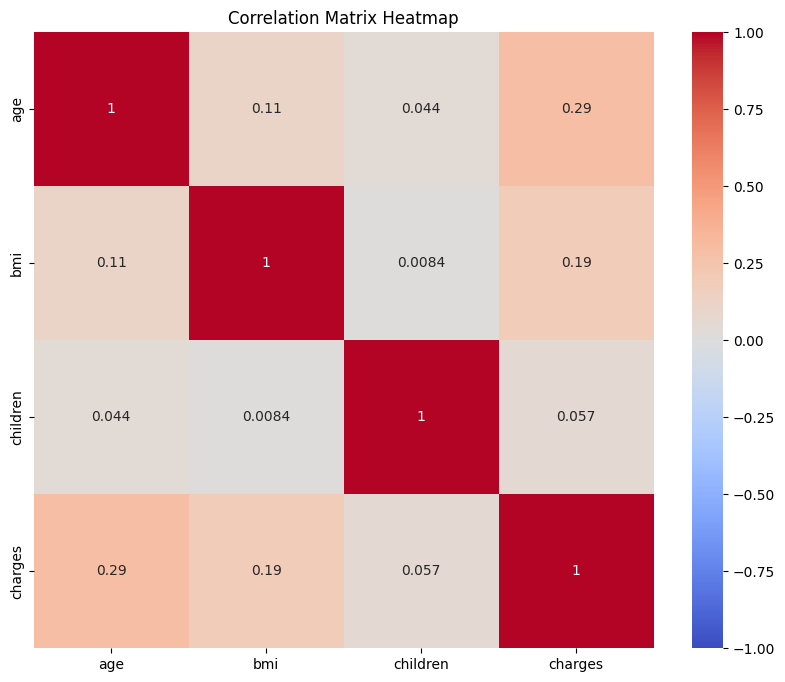

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = sub_insurance.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Due to the positive correlation between charges and age, bmi and children are weak there is no issue for multicollinearity in the dataset

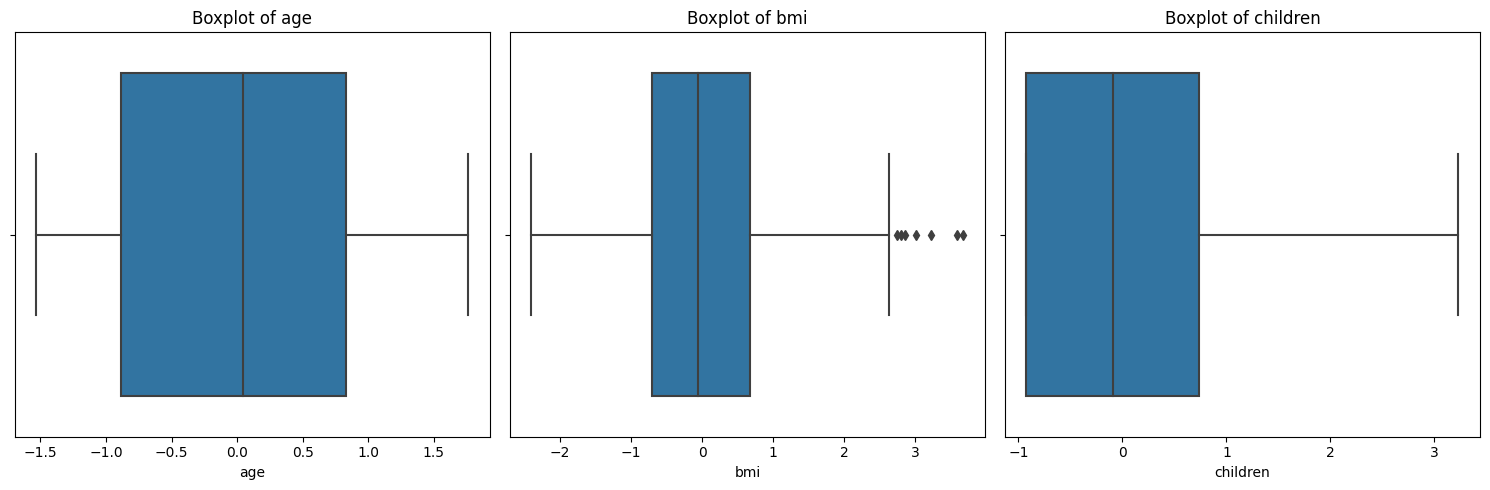

In [ ]:
# Plot boxplots for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=sub_insurance[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [ ]:
numerical_columns = ['age', 'bmi', 'children']
summary_stats = sub_insurance[numerical_columns].describe()
print(summary_stats)


                age           bmi      children

count  1.171000e+03  1.171000e+03  1.171000e+03

mean   2.203380e-16  3.246288e-16  7.584786e-17

std    1.000427e+00  1.000427e+00  1.000427e+00

min   -1.530703e+00 -2.404293e+00 -9.227526e-01

25%   -8.861934e-01 -7.103451e-01 -9.227526e-01

50%    4.476527e-02 -6.380346e-02 -9.220433e-02

75%    8.324995e-01  6.707727e-01  7.383439e-01

max    1.763458e+00  3.683600e+00  3.229989e+00


In [ ]:
iqr_stats = summary_stats.loc[['25%', '75%']].T
iqr_stats['IQR'] = iqr_stats['75%'] - iqr_stats['25%']
iqr_stats['lower_bound'] = iqr_stats['25%'] - 1.5 * iqr_stats['IQR']
iqr_stats['upper_bound'] = iqr_stats['75%'] + 1.5 * iqr_stats['IQR']
print(iqr_stats)


               25%       75%       IQR  lower_bound  upper_bound

age      -0.886193  0.832500  1.718693    -3.464233     3.410539

bmi      -0.710345  0.670773  1.381118    -2.782022     2.742450

children -0.922753  0.738344  1.661097    -3.414397     3.229989


In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize the 'age' column to handle outliers
sub_insurance['age'] = winsorize(sub_insurance['age'], limits=[0.05, 0.05])

# Check the summary statistics for the 'age' column after winsorization
print(sub_insurance['age'].describe())

count    1171.000000

mean       -0.000061

std         0.989191

min        -1.459091

25%        -0.886193

50%         0.044765

75%         0.832500

max         1.620234

Name: age, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.

  arr.partition(


In [ ]:
# Calculate IQR and lower/upper bounds for bmi column
bmi_iqr = np.percentile(sub_insurance['bmi'], 75) - np.percentile(sub_insurance['bmi'], 25)
bmi_lower_bound = np.percentile(sub_insurance['bmi'], 25) - 1.5 * bmi_iqr
bmi_upper_bound = np.percentile(sub_insurance['bmi'], 75) + 1.5 * bmi_iqr


In [ ]:
# Winsorize the children column
winsorized_children = winsorize(sub_insurance['children'], limits=(0.05, 0.05))

# Replace the original children column with the winsorized values
sub_insurance['children'] = winsorized_children


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables and drop the 'SSN' column
# SSN column drop due to irrelevance 
df_encoded = pd.get_dummies(sub_insurance.drop('SSN', axis=1), columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict charges for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 31590928.15

Root Mean Squared Error: 5620.58

R-squared: 0.76


**Explanation:**
The model's R-squared value is 0.76, which suggests that it can explain about 76% of the variance in the insurance charges data. This indicates a relatively good fit, as the model is able to capture a significant portion of the relationship between the input features and the target variable.

However, the model's Root Mean Squared Error (RMSE) is 5,620.58. This means that, on average, the model's predictions are approximately $5,620.58 away from the actual insurance charges. Although the model is able to explain a substantial proportion of the variance in the data, there is still room for improvement, as the error in the predictions can be quite large in some cases.

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




















In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# SSN column drop due to irrelevance 
df_encoded = pd.get_dummies(sub_insurance.drop('SSN', axis=1), columns=['sex', 'smoker', 'region'], drop_first=True)

# Splitting the dataset into training and testing sets
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting and evaluate multiple models using LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Displaying the performance of each model
display(models)

100%|██████████| 42/42 [00:54<00:00,  1.30s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.86,0.86,4224.49,0.40
LGBMRegressor,0.85,0.86,4345.92,0.12
HistGradientBoostingRegressor,0.85,0.85,4421.81,1.68
RandomForestRegressor,0.84,0.85,4502.75,0.38
XGBRegressor,0.83,0.84,4661.15,0.15
BaggingRegressor,0.82,0.83,4761.82,0.06
AdaBoostRegressor,0.81,0.82,4878.86,0.06
ExtraTreesRegressor,0.78,0.79,5268.94,0.95
KNeighborsRegressor,0.77,0.78,5374.13,0.03


**Without the Extra Steps:**
GradientBoostingRegressor has an R-squared value of 0.86 and an RMSE of 4224.49, which indicates a stronger fit and smaller prediction errors compared to the LinearRegression model.
<br> <br>
**With the Extra Steps:**
GradientBoostingRegressor has an R-squared value of 0.87 and an RMSE of 4193.79

## Side Note: 
**(Without the Extra Steps)** This is without any tuning hyperparameters, or performing feature engineering. (Our Baseline Model)

**(With the Extra Steps)** Improved Model, but not Perfect!
<br> <br>
We can now start the Privacy Preserving Techniques.

# Part 3
# Testing Privacy Preserving Methods

## Where to Start the Final Project (With Privacy Preserving)

In [ ]:
!pip install diffprivlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.6 MB/s eta 0:00:00










In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from diffprivlib.models import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy.linalg import norm
import hashlib

ModuleNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/insurance_ssn.csv')

## Simulating External Hard Disk (Without Encryption)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def data_tester(df):
    display(df)
    print()

    shape = df.shape
    display(shape)
    print()

    display('Missing Values:')
    missing_values = df.isnull().sum()
    display(missing_values)
    print()

    display('Data Types:')
    data_types = df.dtypes
    display(data_types)
    print()

    return df, shape, missing_values, data_types

In [ ]:
df = pd.read_csv('/content/insurance_ssn.csv')

In [ ]:
data_tester(df)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


(1171, 8)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
SSN         0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
SSN          object
dtype: object

(      age     sex     bmi  children smoker     region      charges  \
 0      45  female  25.175         2     no  northeast   9095.06825   
 1      36  female  30.020         0     no  northwest   5272.17580   
 2      64  female  26.885         0    yes  northwest  29330.98315   
 3      46    male  25.745         3     no  northwest   9301.89355   
 4      19    male  31.920         0    yes  northwest  33750.29180   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1166   32  female  20.520         0     no  northeast   4544.23480   
 1167   35  female  35.815         1     no  northwest   5630.45785   
 1168   44    male  22.135         2     no  northeast   8302.53565   
 1169   49  female  23.845         3    yes  northeast  24106.91255   
 1170   24  female  23.210         0     no  southeast  25081.76784   
 
               SSN  
 0     999-76-6866  
 1     999-73-5361  
 2     999-27-3385  
 3     999-85-4926  
 4     999-60-7372  
 ...           ...  

In [ ]:
# Dictionary simulating the external storage
external_storage = {
    'admin_key': '/content/insurance_ssn.csv',
    'insurance_key': '/content/insurance_ssn.csv',
    'doctor_key': '/content/insurance_ssn.csv',
}
# Admin key has full access to the dataset
# Insurance providers have access to SSN and medical charges only
# Doctors don't require access to SSN and medical charges, but need everything else
def read_external_storage(key):
    if key in external_storage:
        file_path = external_storage[key]
        df = pd.read_csv(file_path)
                
        if key == 'admin_key':
            return df
        elif key == 'insurance_key':
            return df[['SSN', 'charges']]
        elif key == 'doctor_key':
            return df.drop(['SSN', 'charges'], axis=1)
        else:
            raise ValueError(f"Invalid key: {key}")
    else:
        raise ValueError(f"Invalid key: {key}")

In [ ]:
# Testing the admin key 
admin = read_external_storage('admin_key')
display(admin)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


In [ ]:
# Testing the insurance key 
insurance = read_external_storage('insurance_key')
display(df)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


In [ ]:
# Testing the doctor key 
doctor = read_external_storage('doctor_key')
display(doctor)

,age,sex,bmi,children,smoker,region
0,45,female,25.175,2,no,northeast
1,36,female,30.020,0,no,northwest
2,64,female,26.885,0,yes,northwest
3,46,male,25.745,3,no,northwest
4,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast
1167,35,female,35.815,1,no,northwest
1168,44,male,22.135,2,no,northeast
1169,49,female,23.845,3,yes,northeast


In [ ]:
# Testing a random key
security = read_external_storage('security_key')
display(security)

ValueError: ignored

## Simulating External Hard Disk (with Differential Privacy "Noise")

In [ ]:
# Dictionary simulating the external storage
external_storage = {
    'admin_key': '/content/insurance_ssn.csv',
    'insurance_key': '/content/insurance_ssn.csv',
    'doctor_key': '/content/insurance_ssn.csv',
}

def add_noise(data, epsilon):
    # Calculating the scale of Laplace noise
    # Adding Laplace noise to datapoint

    scale = 1 / epsilon

    noisy_data = data.copy()
    for column in noisy_data.columns:
        if noisy_data[column].dtype == 'object':
            # Converting string column to integer
            try:
                noisy_data[column] = noisy_data[column].astype(int)
            except ValueError:
                # Skip adding noise to non-numeric columns
                continue

        noisy_data[column] = noisy_data[column].apply(lambda x: x + np.random.laplace(0, scale))
    
    return noisy_data

def read_external_storage_with_noise(key, epsilon=0.1):
    if key in external_storage:
        file_path = external_storage[key]
        df = pd.read_csv(file_path)
        
        # Admin key has full access to the dataset
        if key == 'admin_key':
            return df
        # Insurance providers have access to SSN and medical charges only
        elif key == 'insurance_key':
            data = df[['SSN', 'charges']]
            noisy_data = add_noise(data, epsilon)
            return noisy_data
        # Doctors don't require access to SSN and medical charges, but need everything else
        elif key == 'doctor_key':
            data = df.drop(['SSN', 'charges'], axis=1)
            noisy_data = add_noise(data, epsilon)
            return noisy_data
        else:
            raise ValueError(f"Invalid key: {key}")
    else:
        raise ValueError(f"Invalid key: {key}")

In [ ]:
# Testing the insurance key with and without noise
# Displaying both Datasets

insurance = read_external_storage('insurance_key')
insurance_with_noise = read_external_storage_with_noise('insurance_key', epsilon=0.0001)

# Using Concatenate the original and noisy data
# Adding column level to differentiate both datasets
insurance_con = pd.concat([insurance, insurance_with_noise], axis=1)
insurance_con.columns = pd.MultiIndex.from_product([['Original', 'Noisy'], insurance.columns])

display(insurance_con)

Original                     Noisy              
              SSN      charges          SSN       charges
0     999-76-6866   9095.06825  999-76-6866   1987.988885
1     999-73-5361   5272.17580  999-73-5361  13267.697410
2     999-27-3385  29330.98315  999-27-3385  48448.175976
3     999-85-4926   9301.89355  999-85-4926  11858.305003
4     999-60-7372  33750.29180  999-60-7372  29526.521129
...           ...          ...          ...           ...
1166  999-60-9291   4544.23480  999-60-9291  18333.085792
1167  999-29-3501   5630.45785  999-29-3501 -19688.211164
1168  999-60-2184   8302.53565  999-60-2184 -17378.535722
1169  999-48-3257  24106.91255  999-48-3257  16147.064523
1170  999-72-8988  25081.76784  999-72-8988  35575.352215

[1171 rows x 4 columns]

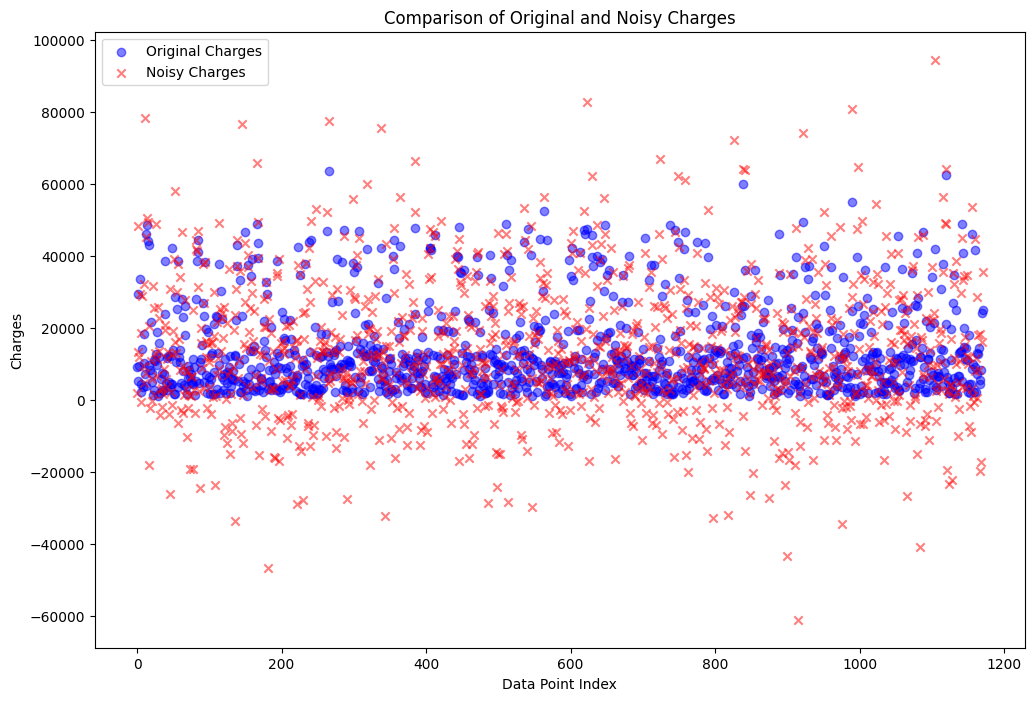

In [ ]:
# Extract charges from original and noisy data
original_charges = insurance['charges']
noisy_charges = insurance_with_noise['charges']

# A scatter plot
plt.figure(figsize=(12, 8))

# Plot the original charges
plt.scatter(range(len(original_charges)), original_charges, alpha=0.5, color='blue', marker='o', label='Original Charges')

# Plot the noisy charges
plt.scatter(range(len(noisy_charges)), noisy_charges, alpha=0.5, color='red', marker='x', label='Noisy Charges')

plt.xlabel('Data Point Index')
plt.ylabel('Charges')
plt.title('Comparison of Original and Noisy Charges')

plt.legend()
plt.show()


In [ ]:
# Testing the doctor key with and without noise
# Displaying both Datasets

doctor = read_external_storage('doctor_key')
doctor_with_noise = read_external_storage_with_noise('doctor_key', epsilon=0.01)

# Using Concatenate the original and noisy data
# Adding column level to differentiate both datasets
doctor_con = pd.concat([doctor, doctor_with_noise], axis=1)
doctor_con.columns = pd.MultiIndex.from_product([['Original', 'Noisy'], doctor.columns])

display(doctor_con)

Original                                                  Noisy          \
          age     sex     bmi children smoker     region         age     sex   
0          45  female  25.175        2     no  northeast  342.967595  female   
1          36  female  30.020        0     no  northwest   51.065379  female   
2          64  female  26.885        0    yes  northwest   66.682889  female   
3          46    male  25.745        3     no  northwest  178.339233    male   
4          19    male  31.920        0    yes  northwest    0.455110    male   
...       ...     ...     ...      ...    ...        ...         ...     ...   
1166       32  female  20.520        0     no  northeast  -86.654646  female   
1167       35  female  35.815        1     no  northwest  140.853002  female   
1168       44    male  22.135        2     no  northeast -152.022939    male   
1169       49  female  23.845        3    yes  northeast -100.328112  female   
1170       24  female  23.210        0     no  southeast -153.647832  female   

                                                
             bmi    children smoker     region  
0      -4.865519  449.530826     no  northeast  
1      18.990716  192.120344     no  northwest  
2    -134.145472  -48.596362    yes  northwest  
3     -52.557070   -6.376379     no  northwest  
4     214.720494  -73.436147    yes  northwest  
...          ...         ...    ...        ...  
1166  153.339941  201.993758     no  northeast  
1167 -155.809584   20.961652     no  northwest  
1168 -106.366818    5.939243     no  northeast  
1169   22.353924  113.999514    yes  northeast  
1170  -96.264168  121.630491     no  southeast  

[1171 rows x 12 columns]

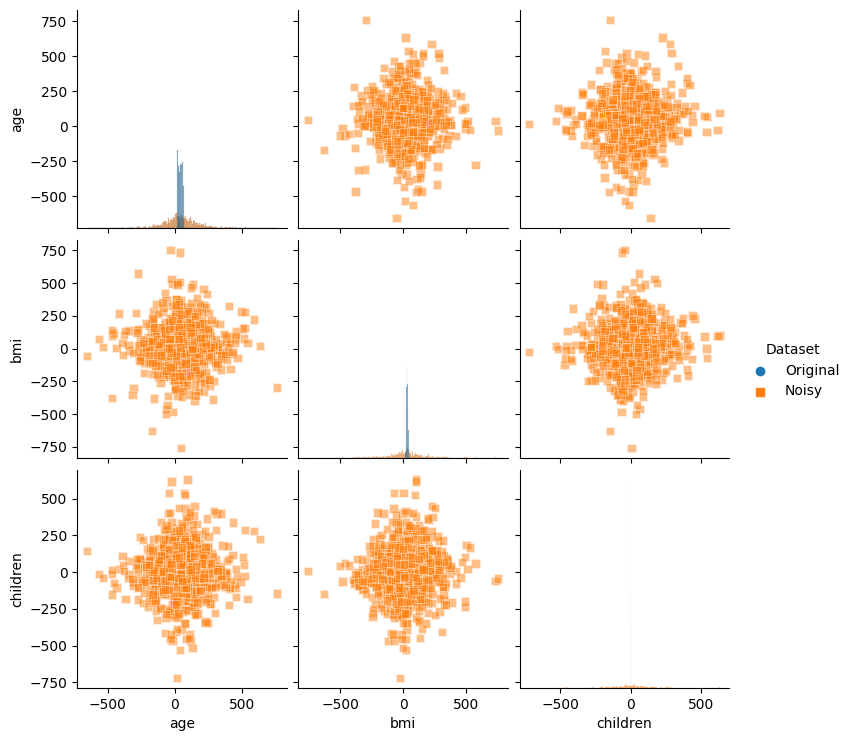

In [ ]:
# Reading both original and noisy data using doctor_key
# Combine original and noisy data into a single dataframe

original_data = read_external_storage('doctor_key')
noisy_data = read_external_storage_with_noise('doctor_key', epsilon=0.01)

original_data['Dataset'] = 'Original'
noisy_data['Dataset'] = 'Noisy'
combined_data = pd.concat([original_data, noisy_data])

# A scatter plot matrix
sns.pairplot(combined_data, hue='Dataset', diag_kind='hist', markers=['o', 's'], plot_kws={'alpha': 0.5})
plt.show()

## Simulating External Hard Disk (with Privacy Preserving ML "Encryption") Not Done

## Pseudonymization: Replacing the SSN with pseudonyms using a a secure hash function

For example, to obtain the digest of the byte string b"Nobody inspects the spammish repetition":

>>>


```
import hashlib
m = hashlib.sha256()
m.update(b"Nobody inspects")
m.update(b" the spammish repetition")
m.digest()
b'\x03\x1e\xdd}Ae\x15\x93\xc5\xfe\\\x00o\xa5u+7\xfd\xdf\xf7\xbcN\x84:\xa6\xaf\x0c\x95\x0fK\x94\x06'
m.hexdigest()
'031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'
```
More condensed:
```
hashlib.sha256(b"Nobody inspects the spammish repetition").hexdigest()
'031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'
```

Reference Link: https://docs.python.org/3/library/hashlib.html

In [ ]:
import hashlib

def pseudonymize_ssn(data):
    for i in range(len(data)):
        data.loc[i, 'SSN'] = hashlib.sha256(data.loc[i, 'SSN'].encode()).hexdigest()
    return data

data = pseudonymize_ssn(df)

In [ ]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,bb81983dcdf5f19a91b28b7bab0c9988c8d5dbd9dbc915...
1,36,female,30.020,0,no,northwest,5272.17580,6fadc68dafab15c8a14ec262c988b2ae8b7a17339fd25a...
2,64,female,26.885,0,yes,northwest,29330.98315,65d2933c7a90a32df54ee2ddccacc372c2fc518127e36d...
3,46,male,25.745,3,no,northwest,9301.89355,8aa3eb6a8104e87a804a370d6b06707aaef6ed20a0ecc9...
4,19,male,31.920,0,yes,northwest,33750.29180,a8b445ec75330a2052f80ed898b9884b9d337ef6a6da9d...
5,34,male,42.900,1,no,southwest,4536.25900,f73fa4269b66f935cfa5e4ccc3fcf0ad61e050267af254...
6,19,female,22.515,0,no,northwest,2117.33885,72a82c4666301b47b780ad05740f7a37ec8d5205875f66...
7,64,male,37.905,0,no,northwest,14210.53595,09e95b88758e4afc07aaf50d316f9fe61565d916ca1325...
8,28,female,17.290,0,no,northeast,3732.62510,cb20363632fdb50619a54c9698781073742dbffd21b6a1...
9,49,male,28.690,3,no,northwest,10264.44210,94f4f127c9a2d89bf1bf1daa8e75c5a4fba375dc1f10e4...


## Applying Differential Privacy & Pseudonymization to a Linear Regression Model

In [ ]:
!pip install diffprivlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.6 MB/s eta 0:00:00










In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from diffprivlib.models import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy.linalg import norm

In [ ]:
data = pd.read_csv('insurance_ssn.csv')
data_tester(data)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


(1171, 8)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
SSN         0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
SSN          object
dtype: object

(      age     sex     bmi  children smoker     region      charges  \
 0      45  female  25.175         2     no  northeast   9095.06825   
 1      36  female  30.020         0     no  northwest   5272.17580   
 2      64  female  26.885         0    yes  northwest  29330.98315   
 3      46    male  25.745         3     no  northwest   9301.89355   
 4      19    male  31.920         0    yes  northwest  33750.29180   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1166   32  female  20.520         0     no  northeast   4544.23480   
 1167   35  female  35.815         1     no  northwest   5630.45785   
 1168   44    male  22.135         2     no  northeast   8302.53565   
 1169   49  female  23.845         3    yes  northeast  24106.91255   
 1170   24  female  23.210         0     no  southeast  25081.76784   
 
               SSN  
 0     999-76-6866  
 1     999-73-5361  
 2     999-27-3385  
 3     999-85-4926  
 4     999-60-7372  
 ...           ...  

In [ ]:
import hashlib

def pseudonymize_ssn(data):
    for i in range(len(data)):
        data.loc[i, 'SSN'] = hashlib.sha256(data.loc[i, 'SSN'].encode()).hexdigest()
    return data
data = pseudonymize_ssn(data)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,SSN
0,0.402826,female,-0.895013,0.738344,no,northeast,-0.355669,bb81983dcdf5f19a91b28b7bab0c9988c8d5dbd9dbc915...
1,-0.241684,female,-0.101474,-0.922753,no,northwest,-0.672268,6fadc68dafab15c8a14ec262c988b2ae8b7a17339fd25a...
2,1.763458,female,-0.614940,-0.922753,yes,northwest,1.320203,65d2933c7a90a32df54ee2ddccacc372c2fc518127e36d...
3,0.474439,male,-0.801655,1.568892,no,northwest,-0.338540,8aa3eb6a8104e87a804a370d6b06707aaef6ed20a0ecc9...
4,-1.459091,male,0.209718,-0.922753,yes,northwest,1.686196,a8b445ec75330a2052f80ed898b9884b9d337ef6a6da9d...


In [ ]:
# Calculate the L2 norm of each row in the data
l2_norms = norm(X, axis=1)

# Get the maximum L2 norm
max_l2_norm = np.max(l2_norms)

print('Max L2 Norm:', max_l2_norm)

Max L2 Norm: 4.383231988180274


In [ ]:
# Initializing the scaler
scaler = StandardScaler()

# Scaling the numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Creating dummy variables for categorical columns
df_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Separating features (X) and target (y)
X = df_encoded.drop(['charges', 'SSN'], axis=1) # we drop 'SSN' because it doesn't provide useful information for our model
y = df_encoded['charges']

# Split the dataset into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying differential privacy from diffprivlib.models
model = LinearRegression(epsilon=1.0, data_norm=4.383231988180274)
model.fit(train_X, train_y)

# Predicting on the test set
pred_y = model.predict(test_X)

# Evaluating the model
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 48560898.21

Root Mean Squared Error: 6968.57

R-squared: -53682785.45


/usr/local/lib/python3.10/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'data_norm' is not functional in diffprivlib.  Remove this parameter to suppress this warning.

  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/linear_regression.py:271: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.

This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.

  warnings.warn(


## Applying Federated Learning with Diagram


### Using a Feed Forward Neural Network Model
### A Centralized Model: 
that consists of a single coordinating organization, called the federation owner or orchestrator, and a set of participant organizations or data owners.

An Overview of Federated Learning: https://www.youtube.com/watch?v=1YbPmkChcbo <br>
Initial thoughts are:
- Perfect for TinyML
- Great for multiple clients with multiple devices
- Outdated 2019  
<br>

A Image Classification Tutorial:
https://github.com/tensorflow/federated/blob/main/docs/tutorials/federated_learning_for_image_classification.ipynb <br>
A link to understand this Module: tff.learning.algorithms.build_weighted_fed_avg
https://www.tensorflow.org/federated/api_docs/python/tff/learning
<br>
A link to showcase the building block in building your own federated learning simulation/ real scenario:
https://www.tensorflow.org/federated/tutorials/building_your_own_federated_learning_algorithm


In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
df = pd.read_csv('/content/insurance_ssn.csv')

In [ ]:
data_tester(df)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


(1171, 8)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
SSN         0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
SSN          object
dtype: object

(      age     sex     bmi  children smoker     region      charges  \
 0      45  female  25.175         2     no  northeast   9095.06825   
 1      36  female  30.020         0     no  northwest   5272.17580   
 2      64  female  26.885         0    yes  northwest  29330.98315   
 3      46    male  25.745         3     no  northwest   9301.89355   
 4      19    male  31.920         0    yes  northwest  33750.29180   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1166   32  female  20.520         0     no  northeast   4544.23480   
 1167   35  female  35.815         1     no  northwest   5630.45785   
 1168   44    male  22.135         2     no  northeast   8302.53565   
 1169   49  female  23.845         3    yes  northeast  24106.91255   
 1170   24  female  23.210         0     no  southeast  25081.76784   
 
               SSN  
 0     999-76-6866  
 1     999-73-5361  
 2     999-27-3385  
 3     999-85-4926  
 4     999-60-7372  
 ...           ...  

In [ ]:
# Had to uninstall and re-install tensorflow_federated for it to work
!pip uninstall -y tensorflow_federated
!pip install tensorflow_federated


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 14.5 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 8.6 MB/s eta 0:00:00






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 14.2 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.5 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 38.8 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 8.7 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.8 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 29.4 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238

In [ ]:
# Restarted the runtime and re-installed tensorflow_federated
!pip install tensorflow_federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 17.6 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 13.2 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.6 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 47.3 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 8.3 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.9 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.6 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 24.4 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.

In [ ]:
# Checking the version of Python
!python --version

Python 3.10.11


In [ ]:
import tensorflow as tf
import tensorflow_federated as tff

In [ ]:
# Printing the version of the "tff" package
print(tff.__version__)

0.57.0


In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
df['client_id'] = df['SSN'].apply(lambda x: int(x[-1]))

# One-hot encode the 'region' column (Categorical Data)
df = pd.get_dummies(df, columns=['region'])

# Partition the data into client datasets to simulate multiple devices 
client_datasets = []
for client_id in df['client_id'].unique():
    client_df = df[df['client_id'] == client_id]
    features = client_df.drop(columns=['charges', 'SSN', 'client_id']).values
    labels = client_df['charges'].values
    client_tf_dataset = tf.data.Dataset.from_tensor_slices((features, labels)).batch(1)
    client_datasets.append(client_tf_dataset)

client_datasets = []
for client_id in client_ids:
    client_df = df[df['SSN'] == client_id]
    
    # Ensure that there is more than one record for each client
    if len(client_df) > 1:
        features = client_df.drop(columns=['charges', 'SSN']).values
        labels = client_df['charges'].values
        client_tf_dataset = tf.data.Dataset.from_tensor_slices((features, labels))
        
        # Batch the dataset its adjustable if needed
        client_tf_dataset = client_tf_dataset.batch(1) 
        client_datasets.append(client_tf_dataset)


# A keras model
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_shape=(6,), activation='relu'),  
        tf.keras.layers.Dense(1)
    ])

# The Keras model in a TFF learning model
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=client_datasets[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )

# Defining the federated averaging process (Averaging Client to Server)

federated_averaging = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

# Running the federated averaging process
state = federated_averaging.initialize()
for _ in range(10):
    state, metrics = federated_averaging.next(state, client_datasets)
    print('metrics:', metrics)

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', nan), ('loss', nan), ('num_examples', 2), ('num_batches', 2)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', nan), ('loss', nan), ('num_examples', 2), ('num_batches', 2)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', nan), ('loss', nan), ('num_examples', 2), ('num_batches', 2)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])

metrics: OrderedDict([('distributor', ()), ('client_

The reason why the the code did not work (input_shape=(6,) instead of input_shape=(9,) due to get.dummies )

In [ ]:
# Wont work without the it being Pre-proceesed
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

# Create client IDs based on the last digit of SSN to simplify the process
# Instead of splitting the ssn to three different categories
df['client_id'] = df['SSN'].apply(lambda x: int(x[-1]))

# One-hot encode the 'region' column (Categorical Data)
df = pd.get_dummies(df, columns=['region'])

# The unique client IDs
client_ids = df['client_id'].unique()

# Partition the data into client datasets to simulate multiple devices 
client_datasets = []
for client_id in client_ids:
    client_df = df[df['client_id'] == client_id]
    
    # Ensure that there is more than one record for each client
    if len(client_df) > 1:
        features = client_df.drop(columns=['charges', 'SSN', 'client_id']).values
        labels = client_df['charges'].values
        client_tf_dataset = tf.data.Dataset.from_tensor_slices((features, labels))
        
        # Batch the dataset its adjustable if needed
        client_tf_dataset = client_tf_dataset.batch(1)
        client_datasets.append(client_tf_dataset)


# A keras model
# Reason why the previous code did not work (input_shape=(9,) due to get.dummies)
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_shape=(9,), activation='relu'),  
        tf.keras.layers.Dense(1)
    ])

# The Keras model in a TFF learning model
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=client_datasets[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )

# Defining the federated averaging process (Averaging Client to Server)
federated_averaging = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

# Running the federated averaging process
state = federated_averaging.initialize()
for _ in range(10):
    state, metrics = federated_averaging.next(state, client_datasets)
    print('metrics:', metrics)

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', nan), ('loss', nan), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', 4.6069037e+18), ('loss', 4.6069037e+18), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])

metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_squared_error', 364011630000000.0), ('loss', 364011630000000.0), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_fini

### Applying the correct client format for a true federated simulation:

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

# Applying scaling to the numerical columns
df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])


# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Dropping SSN column
df = df.drop(columns=['SSN'])

# Splitting data into three parts for three clients
df_naif, df_han, df_tamara = np.array_split(df, 3)

# Converting to TensorFlow datasets for each client: https://www.tensorflow.org/guide/data
tf_dataset_naif = tf.data.Dataset.from_tensor_slices((df_naif.drop(columns=['charges']).values, df_naif['charges'].values)).batch(1)
tf_dataset_han = tf.data.Dataset.from_tensor_slices((df_han.drop(columns=['charges']).values, df_han['charges'].values)).batch(1)
tf_dataset_tamara = tf.data.Dataset.from_tensor_slices((df_tamara.drop(columns=['charges']).values, df_tamara['charges'].values)).batch(1)

# Creating a federated dataset from the individual client datasets: https://www.tensorflow.org/federated/tutorials/federated_learning_for_image_classification
federated_data = [tf_dataset_naif, tf_dataset_han, tf_dataset_tamara]

# Storing the datasets in a dictionary for easy access
client_datasets = {
    'Naif': tf_dataset_naif,
    'Han': tf_dataset_han,
    'Tamara': tf_dataset_tamara,
}

Added or Changed:
*   Feature scaling
*   Learning rate
*   Model Complexity
*   Loss Function

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', 0.47292852), ('loss', 0.47292852), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', 0.31722668), ('loss', 0.31722668), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])

round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', 0.24404208), ('loss', 0.24404208), ('num_examples', 1171), ('num_batches', 1171)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', Ordere

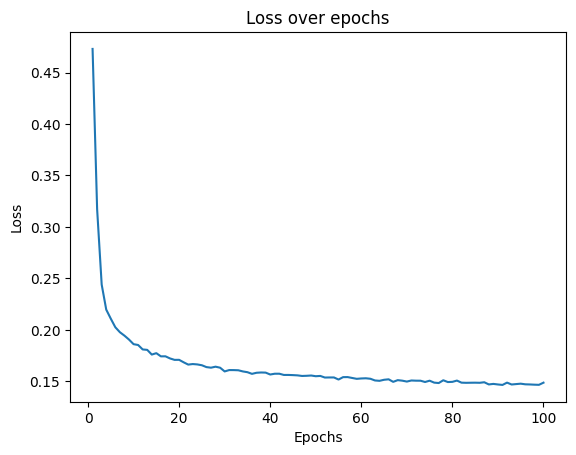

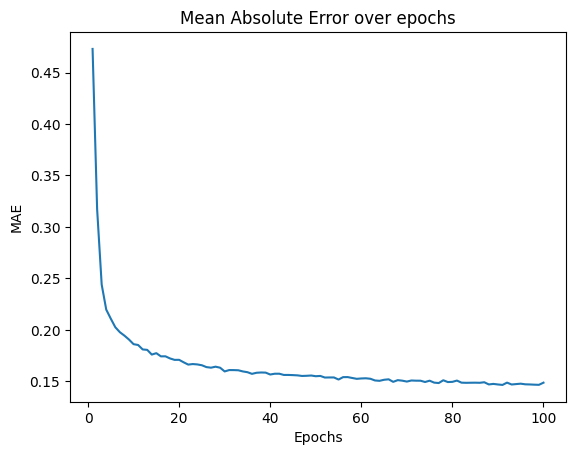

In [ ]:
# Defining a more complex Keras model 
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])


# Defining a loss function changed it from MSE to MAE
loss_fn = tf.keras.losses.MeanAbsoluteError()

# Creating a sample batch to infer input types
sample_spec = tf_dataset_naif.element_spec

# Defining a TFF model 
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=sample_spec,
        loss=loss_fn,
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )
# Building the federated averaging process tff.learning.algorithms.build_weighted_fed_avg changed the 
# learning rate from 0.1 to 0.01 for better metrics 
# To delay convergence 
fed_avg = tff.learning.algorithms.build_weighted_fed_avg(model_fn, client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.01))


# Initializing state
state = fed_avg.initialize()

# Defining total number of rounds
TOTAL_ROUNDS = 100

# Initializing the lists to collect metrics
losses = []
mae = []

# Looping for all rounds
for round_num in range(1, TOTAL_ROUNDS+1):
    state, metrics = fed_avg.next(state, federated_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))
    losses.append(metrics['client_work']['train']['loss'])
    mae.append(metrics['client_work']['train']['loss'])

# Plotting the loss over each round
plt.figure()
plt.plot(range(1, TOTAL_ROUNDS+1), losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plotting the mean absolute error over each round
plt.figure()
plt.plot(range(1, TOTAL_ROUNDS+1), mae)  # Mean Squared Error couldn't work due to outliers
plt.title('Mean Absolute Error over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')

plt.show()

### What worked:
Creation of a federated dataset: We have prepared our data in a federated manner, by splitting it across multiple clients and converting these splits into tf.data.Dataset instances.

Creation of a federated learning model: We defined a function to create a Keras model and then converted this into a TFF model using the tff.learning.models.from_keras_model function.

Running a federated learning algorithm: We used tff.learning.algorithms.build_weighted_fed_avg to create a federated learning algorithm, which we then run for multiple rounds of training.

### What could be improved:

Client Selection: The current implementation assumes that all clients are available for each round of training, which may be different in a realistic federated learning scenario. We should implement client selection strategies to select a subset of clients for each training round. 

Client Weighting: All clients contribute equally to the model update in the current code. In practice, we should assign different weights to different clients based on factors like the amount of local data, the quality of local data, or the client's contribution to the global model's performance. 

Secure Aggregation: Secure aggregation is an essential aspect of federated learning which allows the server to aggregate model updates from clients without being able to inspect individual updates, thereby enhancing privacy. This needs to be covered in our current implementation. 

Differential Privacy: Differential Privacy is another important concept in Federated Learning that helps preserve the privacy of the client's data. We may include mechanisms for adding noise to model updates to ensure differential privacy, which was already done as a standalone. 

Handling Non-IID data: In a realistic federated learning scenario, data across different clients may be non-IID (Independent and Identically Distributed). This poses several challenges, and there are various strategies to handle such systems which we should consider. 

Communication Efficiency: Communication over the network can be a bottleneck in Federated Learning. Techniques to reduce the communication cost, such as model compression like Tensorlite, could be considered. 

Model Personalization: The current implementation aims for a global model that performs well on all clients. However, in some scenarios, allowing for local model adaptations for personalization could be beneficial.

In [ ]:
       (1) Initialize
             |
             v
   +---------+---------+     +---------+---------+     +---------+---------+
   |    Client 1       |     |    Client 2       |     |    Client N       |
   | - Local dataset   |     | - Local dataset   |     | - Local dataset   |
   | - Copy of model   |     | - Copy of model   |     | - Copy of model   |
   +---------+---------+     +---------+---------+     +---------+---------+
             | (2) Broadcast  | (2) Broadcast  | (2) Broadcast
             | Model Params   | Model Params   | Model Params
             v                v                v
             | (3) Local      | (3) Local      | (3) Local
             | Computation    | Computation    | Computation
             |                |                |
+------------+-------+     +--+------------+   |  +---------+---------+
| Updated Model Params |     | Updated Model Params |  | Updated Model Params |
+------------+-------+     +--+------------+   |  +---------+---------+
             | (4) Aggregation | (4) Aggregation | (4) Aggregation
             +-----------------+-----------------+-----------------+
                                       |
                                       v
                              (5) Global Model Update
                                       |
                                       v
                                  (6) iIterate


"Data Scaling" represents the step of scaling the numerical features in the dataset.

"One-Hot Encoding" indicates the process of converting categorical features into a binary vector representation.

"Data Splitting" represents the division of data into different parts for each client in the federated learning setting.

"Federated Data" indicates the dataset used for each client in the federated learning process.

"Keras Model" represents the machine learning model built using the Keras library.

"Loss Function" represents the function used to compute the loss or error of the model.

"TFF Model" represents the TensorFlow Federated (TFF) model, which adapts the Keras model for federated learning.

"Federated Averaging" represents the federated averaging algorithm used to train the model collaboratively across clients.

"Training Loop" represents the iterative training process of the federated averaging algorithm.

"Losses" indicates the loss values during the training process.

"Mean Absolute Error" represents the mean absolute error metric used to evaluate the model's performance.

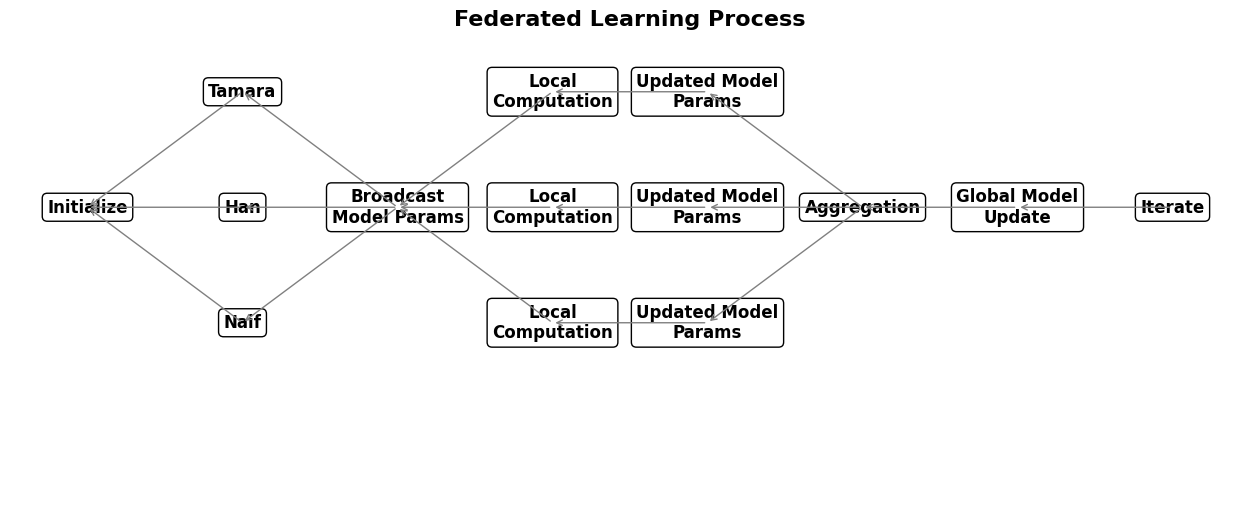

In [ ]:
# Creat nodes
nodes = [
    ("Initialize", (0, 4)),
    ("Naif", (2, 2)),
    ("Han", (2, 4)),
    ("Tamara", (2, 6)),
    ("Broadcast\nModel Params", (4, 4)),
    ("Local\nComputation", (6, 2)),
    ("Local\nComputation", (6, 4)),
    ("Local\nComputation", (6, 6)),
    ("Updated Model\nParams", (8, 2)),
    ("Updated Model\nParams", (8, 4)),
    ("Updated Model\nParams", (8, 6)),
    ("Aggregation", (10, 4)),
    ("Global Model\nUpdate", (12, 4)),
    ("Iterate", (14, 4))
]

edges = [
    ((0, 4), (2, 2)), ((0, 4), (2, 4)), ((0, 4), (2, 6)),
    ((2, 2), (4, 4)), ((2, 4), (4, 4)), ((2, 6), (4, 4)),
    ((4, 4), (6, 2)), ((4, 4), (6, 4)), ((4, 4), (6, 6)),
    ((6, 2), (8, 2)), ((6, 4), (8, 4)), ((6, 6), (8, 6)),
    ((8, 2), (10, 4)), ((8, 4), (10, 4)), ((8, 6), (10, 4)),
    ((10, 4), (12, 4)), ((12, 4), (14, 4))
]


fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlim([-1, 15])
ax.set_ylim([-1, 7])
for node, pos in nodes:
    ax.text(pos[0], pos[1], node, ha="center", va="center", fontsize=12, fontweight="bold",
            bbox=dict(boxstyle="round", facecolor="white"))

for start, end in edges:
    ax.annotate("", xy=start, xytext=end, arrowprops=dict(arrowstyle="->", linewidth=1, color="gray"))


ax.set_title("Federated Learning Process", fontsize=16, fontweight="bold")
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")
plt.show()

## Federated Learning Process

[Federated Learning](https://ai.googleblog.com/2017/04/federated-learning-collaborative.html) is a machine learning setting where multiple devices (clients) collaboratively learn a shared model while keeping all the training data on the original device, decoupling the ability to do machine learning from the need to store the data in the cloud. This has the advantage of privacy by design: The raw data is never exposed to the server, and sensitive information remains on the device. Here is the general flow of the Federated Learning process:

1. **Initialization**: The server initializes the global model parameters $w$.

2. **Broadcast**: The server sends these parameters $w$ to all participating devices (clients).

3. **Local Computation**: Each client computes an update to the model parameters based on its local data. Specifically, the client computes a gradient of the loss function with respect to the model parameters. Let $x_i$ represent the local data for client $i$ and $y_i$ represent the labels. The client computes a local update $\delta_i$ as follows:
$$\delta_i = -\eta \nabla_w L(w;x_i, y_i)$$
where $L$ is the loss function, $\eta$ is the learning rate, and $\nabla$ denotes the gradient.

4. **Send Model Updates**: Each client sends its computed update $\delta_i$ back to the server.

5. **Aggregation**: The server aggregates the updates from each client to compute an overall update. The simplest way to do this is to compute an average:
$$\Delta = \frac{1}{n}\sum_{i=1}^{n}\delta_i$$
where $n$ is the total number of clients in our case 3.

6. **Global Model Update**: The server updates the global model parameters based on the aggregated update:
$$w = w + \Delta$$

7. **Iterate**: The process repeats from step 2 until convergence, i.e., until the change in the global model parameters is smaller than a specified threshold.

For more detailed information, you can refer to [Communication-Efficient Learning of Deep Networks from Decentralized Data](https://arxiv.org/abs/1602.05629) and [Advances and Open Problems in Federated Learning](https://arxiv.org/abs/1912.04977).


In [ ]:
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz
!pip install pydot pydotplus

Reading package lists... Done

Building dependency tree       

Reading state information... Done

graphviz is already the newest version (2.42.2-3build2).

The following additional packages will be installed:

  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common

  libgvc6-plugins-gtk libxdot4

Suggested packages:

  gvfs

The following NEW packages will be installed:

  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin

  libgtk2.0-common libgvc6-plugins-gtk libxdot4

0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.

Need to get 2,148 kB of archives.

After this operation, 7,427 kB of additional disk space will be used.

Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]

Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]

Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]

Get:4 http://

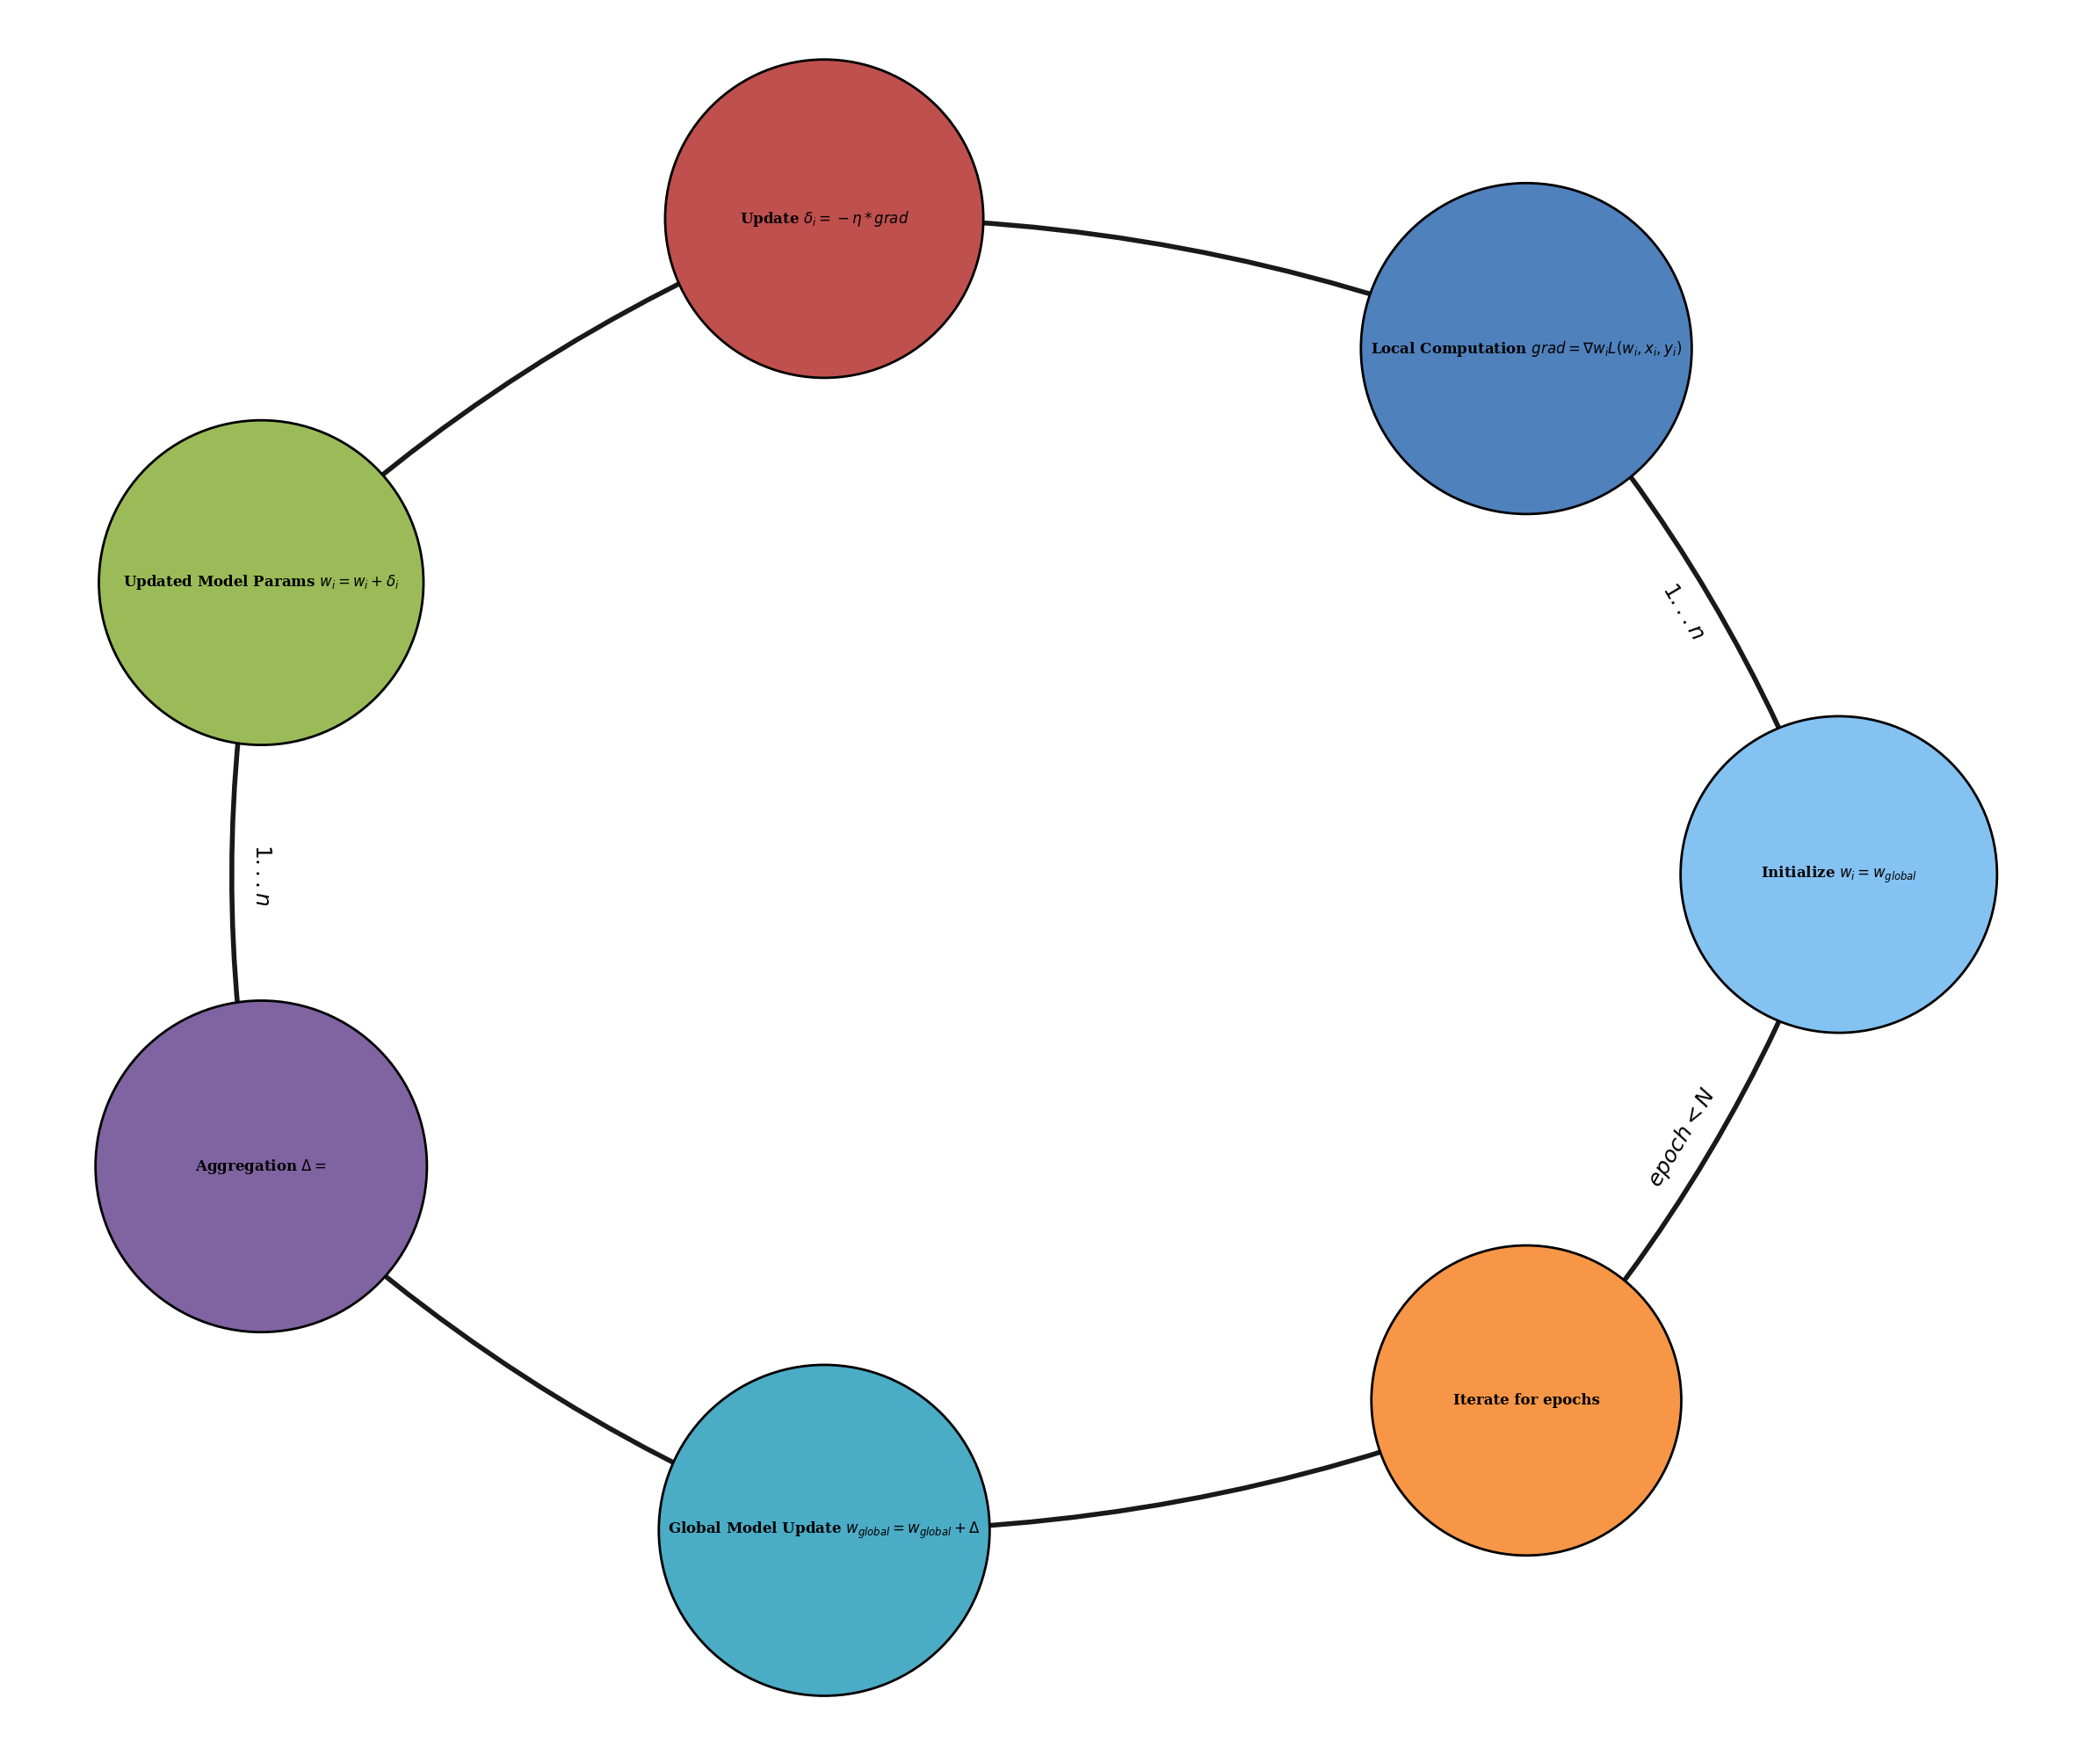

In [ ]:
import networkx as nx

G = nx.DiGraph()

nodes = {
'start': 'Initialize $w_i = w_{global}$',
'local_comp': r'Local Computation $grad = \nabla w_i L(w_i, x_i, y_i)$',
'update': 'Update $\delta_i = -\eta * grad$',
'updated_model_params': 'Updated Model Params $w_i = w_i + \delta_i$',
'aggregation': 'Aggregation $\Delta = \frac{1}{n}\sum_{i=1}^{n}\delta_i$',
'global_update': 'Global Model Update $w_{global} = w_{global} + \Delta$',
'iterate': 'Iterate for epochs'
}

for node, label in nodes.items():
  G.add_node(node, label=label)

edges = [
('start', 'local_comp'),
('local_comp', 'update'),
('update', 'updated_model_params'),
('updated_model_params', 'aggregation'),
('aggregation', 'global_update'),
('global_update', 'iterate'),
('iterate', 'start')
]
G.add_edges_from(edges)

edge_labels = {
('start', 'local_comp'): r'$1...n$',
('local_comp', 'update'): '',
('update', 'updated_model_params'): '',
('updated_model_params', 'aggregation'): r'$1...n$',
('aggregation', 'global_update'): '',
('global_update', 'iterate'): '',
('iterate', 'start'): r'$epoch < N$'
}

node_sizes = [60000 + len(label) * 250 for label in nx.get_node_attributes(G, 'label').values()]

color_palette = ['#84C2F2', '#4F81BD', '#C0504D', '#9BBB59', '#8064A2', '#4BACC6', '#F79646']
colors = [color_palette[i % len(color_palette)] for i in range(len(G))]

plt.figure(figsize=(24, 20))
pos = nx.circular_layout(G) # Use circular layout for the graph
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, node_shape='o', edgecolors='k', linewidths=2.0)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=12, font_weight='bold', font_family='serif', verticalalignment='center')
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.1', edge_color='black', width=4, arrowstyle='-|>', alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=18, font_family='serif')
plt.axis('off')
plt.margins(0.1)
plt.tight_layout()
plt.show()

In [ ]:
!pip install dot2tex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/







### Explanation
1.   Data Preparation: The script begins by manipulating the dataset. Numerical columns ('age', 'bmi', 'children', and 'charges') are standardized using sklearn's StandardScaler. This ensures that these features have a mean value of 0 and a standard deviation of 1, reducing the sensitivity of the model to varying scales. The script also converts categorical columns ('sex', 'smoker', and 'region') into binary vectors via one-hot encoding. An unneeded column, 'SSN', is subsequently discarded.

2.   Data Segregation: The processed data is then divided into three segments, each intended for a different participant ('Naif', 'Han', 'Tamara'). This aligns with the concept of federated learning, where each participant has a unique subset of the overall data.

3.   TensorFlow Dataset Creation: The script transforms each client's data into a TensorFlow dataset, which is then batched. The model's inputs are all columns excluding 'charges', while 'charges' is set as the target variable.

4.   Formation of Federated Dataset: All the individual client datasets are gathered into a list to form a federated dataset.

5.   Model Architecture: Using Keras, the script defines a neural network model with two dense layers (using ReLU activation) and a final output layer (without any activation function), typically used in regression problems.

6.   TFF Model Initialization: The Keras model is wrapped into a TFF model with the help of the tff.learning.from_keras_model function. The model uses mean absolute error (MAE) as its loss function and mean squared error (MSE) as its performance metric.

7.   Setting up Federated Learning Process: The script sets up the federated learning process by calling the tff.learning.build_federated_averaging_process function. This function establishes a federated averaging process, enabling the model to learn from the federated data. The client optimizer chosen for this process is the stochastic gradient descent (SGD) with a learning rate of 0.01.

8.   Model Training: The model training phase consists of a certain number of rounds. In each round, the script calls the 'next' method of the federated averaging process. This method executes one federated averaging step, which involves training the model on each client's data, transmitting the model updates to the server, and averaging these updates.

9.   Model Evaluation: After each round of training, the script logs the model's loss and MAE. These values are subsequently visualized to demonstrate how the model's performance evolves over the training rounds.

In [ ]:
!pip install pydot pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





* !apt-get install -y graphviz libgraphviz-dev
* !pip install pygraphviz
* !pip install pydot pydotplus

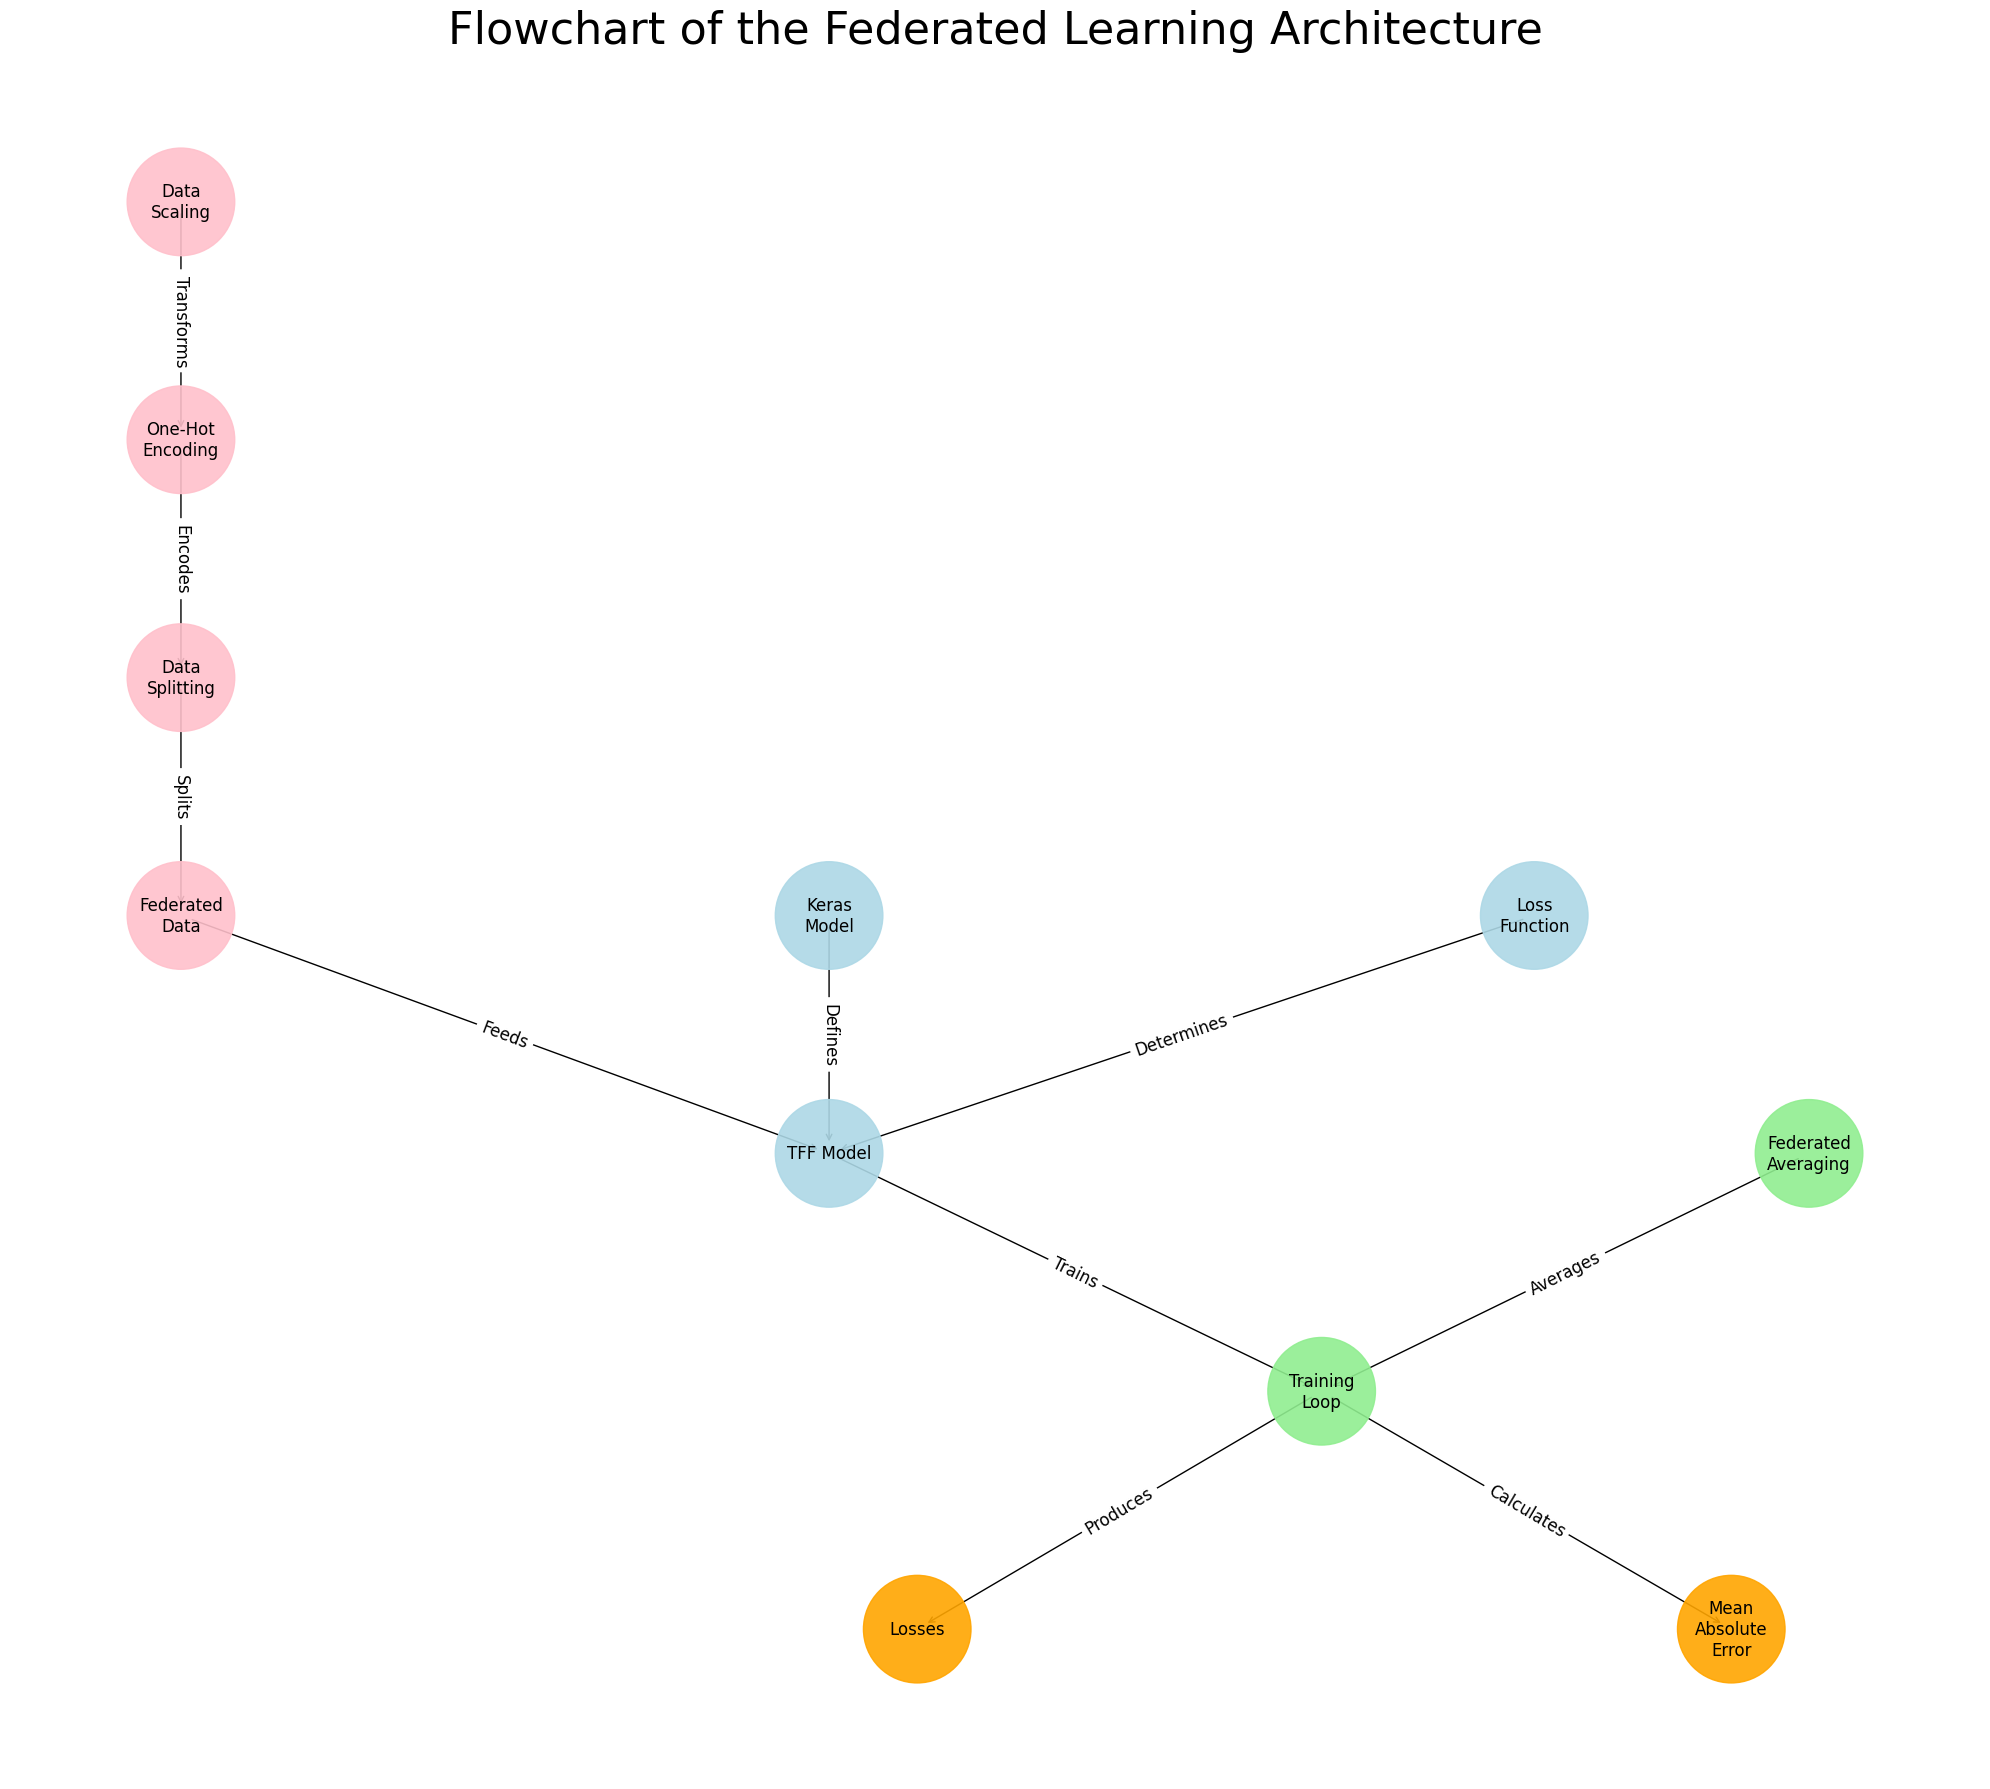

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import textwrap

# Defining the nodes and their attributes
nodes = {
    "Data Scaling": {"color": "pink", "shape": "box", "size": 2000},
    "One-Hot Encoding": {"color": "pink", "shape": "box", "size": 2000},
    "Data Splitting": {"color": "pink", "shape": "box", "size": 2000},
    "Federated Data": {"color": "pink", "shape": "box", "size": 2000},
    "Keras Model": {"color": "lightblue", "shape": "ellipse", "size": 2000},
    "Loss Function": {"color": "lightblue", "shape": "ellipse", "size": 2000},
    "TFF Model": {"color": "lightblue", "shape": "ellipse", "size": 2000},
    "Federated Averaging": {"color": "lightgreen", "shape": "diamond", "size": 2000},
    "Training Loop": {"color": "lightgreen", "shape": "diamond", "size": 2000},
    "Losses": {"color": "orange", "shape": "hexagon", "size": 2000},
    "Mean Absolute Error": {"color": "orange", "shape": "hexagon", "size": 2000},
}

# Creating a new graph
graph = nx.DiGraph()

# Adding nodes to the graph
for node, attributes in nodes.items():
    graph.add_node(node, **attributes)

# Defining the edges and their attributes
edges = {
    ("Data Scaling", "One-Hot Encoding"): {"label": "Transforms"},
    ("One-Hot Encoding", "Data Splitting"): {"label": "Encodes"},
    ("Data Splitting", "Federated Data"): {"label": "Splits"},
    ("Federated Data", "TFF Model"): {"label": "Feeds"},
    ("Keras Model", "TFF Model"): {"label": "Defines"},
    ("Loss Function", "TFF Model"): {"label": "Determines"},
    ("Federated Averaging", "Training Loop"): {"label": "Averages"},
    ("TFF Model", "Training Loop"): {"label": "Trains"},
    ("Training Loop", "Losses"): {"label": "Produces"},
    ("Training Loop", "Mean Absolute Error"): {"label": "Calculates"},
}

# Adding edges to the graph
for edge, attributes in edges.items():
    graph.add_edge(*edge, **attributes)

# Graphing layout setting
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")

# Specifying the positions of the nodes
node_positions = {
    "Data Scaling": (59.5, 540.0),
    "One-Hot Encoding": (59.5, 453.0),
    "Data Splitting": (59.5, 366.0),
    "Federated Data": (59.5, 279.0),
    "Keras Model": (184.5, 279.0),
    "Loss Function": (320.5, 279.0),
    "TFF Model": (184.5, 192.0),
    "Federated Averaging": (373.5, 192.0),
    "Training Loop": (279.5, 105.0),
    "Losses": (201.5, 18.0),
    "Mean Absolute Error": (358.5, 18.0),
}

# Creating a new figure with the desired size
plt.figure(figsize=(20, 18))

# Increasing the size of the node circles
node_sizes = [node[1]["size"] * 3 for node in graph.nodes(data=True)]

# Drawing the nodes with specified positions
nx.draw_networkx_nodes(
    graph,
    pos=node_positions,
    node_color=[node[1]["color"] for node in graph.nodes(data=True)],
    node_size=node_sizes,
    alpha=0.9,
)

# Drawing the node labels
labels = {node: textwrap.fill(node, width=10) for node in graph.nodes()}
nx.draw_networkx_labels(graph, node_positions, labels=labels, font_size=12)

# Drawing the edges
nx.draw_networkx_edges(graph, pos, arrows=True, arrowstyle="->", arrowsize=10)

# Drawing the edge labels
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)
plt.title('Flowchart of the Federated Learning Architecture', fontsize=32)
plt.axis('off')
plt.tight_layout()
plt.show()

## EHR Archeticture with Diagram

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def data_tester(df):
    display(df)
    print()

    shape = df.shape
    display(shape)
    print()

    display('Missing Values:')
    missing_values = df.isnull().sum()
    display(missing_values)
    print()

    display('Data Types:')
    data_types = df.dtypes
    display(data_types)
    print()

    return df, shape, missing_values, data_types

In [ ]:
df = pd.read_csv('/content/insurance_ssn.csv')
data_tester(df)

,age,sex,bmi,children,smoker,region,charges,SSN
0,45,female,25.175,2,no,northeast,9095.06825,999-76-6866
1,36,female,30.020,0,no,northwest,5272.17580,999-73-5361
2,64,female,26.885,0,yes,northwest,29330.98315,999-27-3385
3,46,male,25.745,3,no,northwest,9301.89355,999-85-4926
4,19,male,31.920,0,yes,northwest,33750.29180,999-60-7372
...,...,...,...,...,...,...,...,...
1166,32,female,20.520,0,no,northeast,4544.23480,999-60-9291
1167,35,female,35.815,1,no,northwest,5630.45785,999-29-3501
1168,44,male,22.135,2,no,northeast,8302.53565,999-60-2184
1169,49,female,23.845,3,yes,northeast,24106.91255,999-48-3257


(1171, 8)

'Missing Values:'

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
SSN         0
dtype: int64

'Data Types:'

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
SSN          object
dtype: object

(      age     sex     bmi  children smoker     region      charges  \
 0      45  female  25.175         2     no  northeast   9095.06825   
 1      36  female  30.020         0     no  northwest   5272.17580   
 2      64  female  26.885         0    yes  northwest  29330.98315   
 3      46    male  25.745         3     no  northwest   9301.89355   
 4      19    male  31.920         0    yes  northwest  33750.29180   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1166   32  female  20.520         0     no  northeast   4544.23480   
 1167   35  female  35.815         1     no  northwest   5630.45785   
 1168   44    male  22.135         2     no  northeast   8302.53565   
 1169   49  female  23.845         3    yes  northeast  24106.91255   
 1170   24  female  23.210         0     no  southeast  25081.76784   
 
               SSN  
 0     999-76-6866  
 1     999-73-5361  
 2     999-27-3385  
 3     999-85-4926  
 4     999-60-7372  
 ...           ...  

In [ ]:
import uuid
import datetime
from pandas import DataFrame
import csv

# Load the dataset
df: DataFrame = pd.read_csv('/content/insurance_ssn.csv')

# Anonymize the data by replacing SSNs with random UUIDs
df['SSN'] = [uuid.uuid4() for _ in range(len(df))]

class Logger:
    def __init__(self, csv_filename="log.csv"):
        self.csv_filename = csv_filename
        self.log_file = open(self.csv_filename, 'a', newline='')
        self.writer = csv.writer(self.log_file)
        self.is_first_entry = self.log_file.tell() == 0

    def log(self, message):
        timestamp = datetime.datetime.now()
        print(f'[{timestamp}]: {message}')
        if self.is_first_entry:
            self.writer.writerow(["Timestamp", "Message"])
            self.is_first_entry = False
        self.writer.writerow([str(timestamp), message])

    def close(self):
        self.log_file.close()

class Role:
    def __init__(self, name, permissions):
        self.name = name
        self.permissions = permissions

class User:
    def __init__(self, name, role):
        self.name = name
        self.role = role

class Record:
    def __init__(self, data, logger):
        self.data = data
        self.third_party_permissions = []
        self.logger = logger

class Patient:
    def __init__(self, name, age, logger):
        self.name = name
        self.age = age
        self.logger = logger

class PatientRecord:
    def __init__(self, patient, data):
        self.patient = patient
        self.data = data
        self.logger = patient.logger

    def add_data(self, new_data):
        self.data.update(new_data)
        self.logger.log(f'New data added for patient {self.patient.name}: {new_data}')

class Doctor:
    def __init__(self, name, logger):
        self.name = name
        self.logger = logger

    def notify(self, message):
        self.logger.log(f"Doctor {self.name}, {message}")

class HealthRiskAssessment:
    def __init__(self, record):
        self.record = record

    def assess_bmi_and_update_record(self, new_bmi, doctor):
        self.record.add_data({'bmi': new_bmi})
        self.alert_if_at_risk(doctor)

    def alert_if_at_risk(self, doctor):
        bmi = self.record.data.get('bmi')
        if bmi is not None and (bmi < 18.5 or bmi > 25):
            doctor.notify(f"Patient {self.record.patient.name} is at risk due to BMI of {bmi}")

class Hospital:
    def __init__(self, name, logger):
        self.name = name
        self.doctors = []
        self.patients = []
        self.logger = logger

    def add_doctor(self, doctor):
        if doctor not in self.doctors:
            self.doctors.append(doctor)
            self.logger.log(f'Doctor {doctor.name} has joined the hospital {self.name}.')

    def add_patient(self, patient):
        if patient not in self.patients:
            self.patients.append(patient)
            self.logger.log(f'Patient {patient.name} has joined the hospital {self.name}.')

    def assign_doctor_to_patient(self, doctor, patient):
        if doctor in self.doctors and patient in self.patients:
            patient_record = PatientRecord(patient, {'doctor': doctor.name})
            self.logger.log
            (f'Doctor {doctor.name} has been assigned to patient {patient.name}.')
            return patient_record
        else:
            self.logger.log(f'Error: Doctor {doctor.name} and/or patient {patient.name} are not part of the hospital {self.name}.')

class Pharmacy:
    def __init__(self, name):
        self.name = name
        self.medication_stock = {}
        self.logger = Logger()

    def add_medication(self, medication, quantity):
        if medication in self.medication_stock:
            self.medication_stock[medication] += quantity
        else:
            self.medication_stock[medication] = quantity
            self.logger.log(f'{quantity} units of {medication} added to the pharmacy {self.name}.')

    def dispense_medication(self, medication, quantity):
        if medication in self.medication_stock and self.medication_stock[medication] >= quantity:
            self.medication_stock[medication] -= quantity
            self.logger.log(f'{quantity} units of {medication} dispensed from the pharmacy {self.name}.')
        else:
            self.logger.log(f'Error: Insufficient stock of {medication} in the pharmacy {self.name}.')

In [ ]:
# Testing the Classes Part 1: 
# ------------------------------------------------------------------------------

# Initializing the Logger object before creating the rest of the data
logger = Logger('hospital_1_log.csv')

# Creating a role with rules and responsibilities and a user
admin_role = Role('admin', ['read', 'write', 'delete'])
admin_user = User('Prof. Tamara', admin_role)

# Printing user name and the role
print(f'User: {admin_user.name}, Role: {admin_user.role.name}')

# Creating a Doctor
doctor_1 = Doctor('Dr. Han', logger)

# Creating a hospital and adding the patient and the doctor to it
hospital_1 = Hospital('UW Medical Center',logger)
hospital_1.add_doctor(doctor_1)

# Creating a Patient and assigning the doctor to the patient
# Pass the logger object explicitly
patient_1 = Patient('Naif', 25, logger)  

hospital_1.add_patient(patient_1)
patient_record_1 = hospital_1.assign_doctor_to_patient(doctor_1, patient_1)

patient_record_1.add_data({'weight': 85, 'height': 1.85})

# Creating a health risk assessment for the patient based on BMI
hra_1 = HealthRiskAssessment(patient_record_1)

# Calculating BMI (weight in kg / (height in m)^2) and updating patient's record
bmi = patient_record_1.data.get('weight') / (patient_record_1.data.get('height') ** 2)
hra_1.assess_bmi_and_update_record(bmi, doctor_1)

# Working in Progress with Pharmacy
pharmacy_1 = Pharmacy('UW Medical Center Pharmacy')
pharmacy_1.add_medication('Iburprofen', 500)
pharmacy_1.dispense_medication('Aspirin', 50)

# Closing the Logger
logger.close()


User: Prof. Tamara, Role: admin

[2023-05-22 18:25:37.119276]: Doctor Dr. Han has joined the hospital UW Medical Center.

[2023-05-22 18:25:37.119936]: Patient Naif has joined the hospital UW Medical Center.

[2023-05-22 18:25:37.123667]: Doctor Dr. Han has been assigned to patient Naif.

[2023-05-22 18:25:37.124321]: New data added for patient Naif: {'weight': 85, 'height': 1.85}

[2023-05-22 18:25:37.125029]: New data added for patient Naif: {'bmi': 24.835646457268076}

[2023-05-22 18:25:37.125880]: 500 units of Iburprofen added to the pharmacy UW Medical Center Pharmacy.

[2023-05-22 18:25:37.126489]: Error: Insufficient stock of Aspirin in the pharmacy UW Medical Center Pharmacy.


In [ ]:
# Testing the Classes Part 2: 
# ------------------------------------------------------------------------------

# Initializing the Logger object before creating the rest of the data
logger = Logger('hospital_2_log.csv')

# Creating a role with rules and responsibilities and a user
patient_role = Role('patient', ['read'])
patient_user = User('Zack', patient_role)

# Printing user name and the role
print(f'User: {patient_user.name}, Role: {patient_user.role.name}')

# Creating a Doctor
doctor_2 = Doctor('Dr. Steve', logger)

# Creating a hospital and adding the patient and the doctor to it
hospital_2 = Hospital('Seattle Hospital', logger)
hospital_2.add_doctor(doctor_2)

# Creating a Patient and assigning the doctor to the patient
# Pass the logger object explicitly
patient_2 = Patient('Zack', 35, logger)  

hospital_2.add_patient(patient_2)
patient_record_2 = hospital_2.assign_doctor_to_patient(doctor_2, patient_2)

patient_record_2.add_data({'weight': 60, 'height': 1.55})

# Creating a health risk assessment for the patient based on BMI
hra_2 = HealthRiskAssessment(patient_record_2)

# Calculating BMI (weight in kg / (height in m)^2) and updating patient's record
bmi = patient_record_2.data.get('weight') / (patient_record_2.data.get('height') ** 2)
hra_2.assess_bmi_and_update_record(bmi, doctor_2)

# Working in Progress with Pharmacy
pharmacy_2 = Pharmacy('Seattle Pharmacy')
pharmacy_2.add_medication('XYZ', 500)
pharmacy_2.dispense_medication('XYZ', 50)

# Closing the Logger
logger.close()

User: Zack, Role: patient

[2023-05-22 18:25:40.444895]: Doctor Dr. Steve has joined the hospital Seattle Hospital.

[2023-05-22 18:25:40.445146]: Patient Zack has joined the hospital Seattle Hospital.

[2023-05-22 18:25:40.445296]: Doctor Dr. Steve has been assigned to patient Zack.

[2023-05-22 18:25:40.445482]: New data added for patient Zack: {'weight': 60, 'height': 1.55}

[2023-05-22 18:25:40.448007]: New data added for patient Zack: {'bmi': 24.97398543184183}

[2023-05-22 18:25:40.449134]: 500 units of XYZ added to the pharmacy Seattle Pharmacy.

[2023-05-22 18:25:40.449310]: 50 units of XYZ dispensed from the pharmacy Seattle Pharmacy.


In [ ]:
hs_1_log = pd.read_csv('/content/hospital_1_log.csv')
hs_2_log = pd.read_csv('/content/hospital_2_log.csv')

In [ ]:
pd.set_option('display.max_colwidth', None) # To showcase the full message
display(hs_1_log)
print()
display(hs_2_log)

,Timestamp,Message
0,2023-05-22 18:25:37.119276,Doctor Dr. Han has joined the hospital UW Medical Center.
1,2023-05-22 18:25:37.119936,Patient Naif has joined the hospital UW Medical Center.
2,2023-05-22 18:25:37.123667,Doctor Dr. Han has been assigned to patient Naif.
3,2023-05-22 18:25:37.124321,"New data added for patient Naif: {'weight': 85, 'height': 1.85}"
4,2023-05-22 18:25:37.125029,New data added for patient Naif: {'bmi': 24.835646457268076}


,Timestamp,Message
0,2023-05-22 18:25:40.444895,Doctor Dr. Steve has joined the hospital Seattle Hospital.
1,2023-05-22 18:25:40.445146,Patient Zack has joined the hospital Seattle Hospital.
2,2023-05-22 18:25:40.445296,Doctor Dr. Steve has been assigned to patient Zack.
3,2023-05-22 18:25:40.445482,"New data added for patient Zack: {'weight': 60, 'height': 1.55}"
4,2023-05-22 18:25:40.448007,New data added for patient Zack: {'bmi': 24.97398543184183}


In [ ]:
log = pd.read_csv('/content/log.csv')

EmptyDataError: ignored

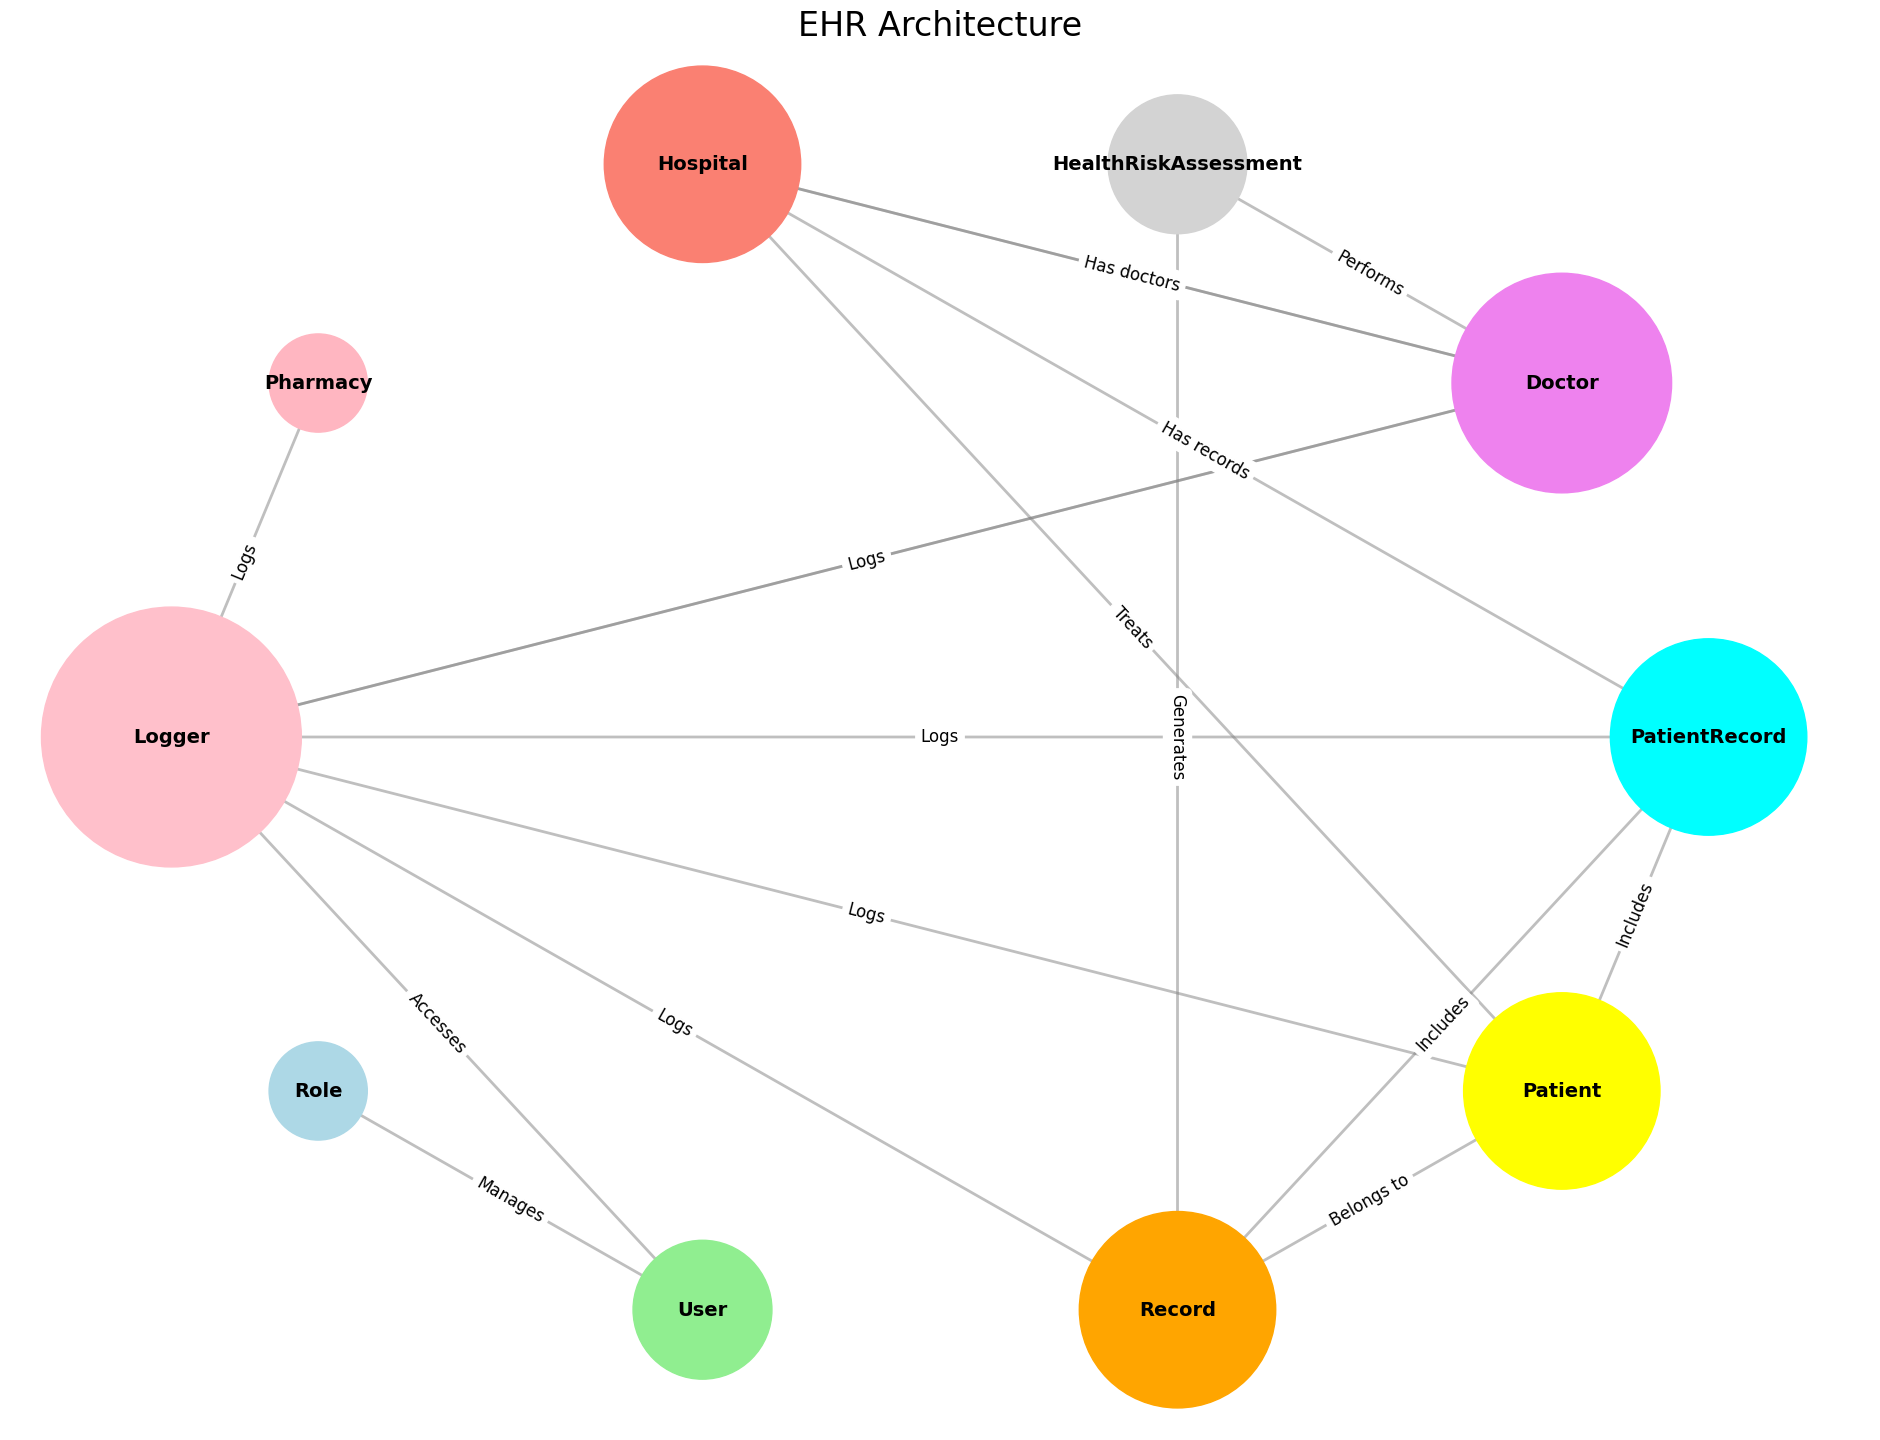

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a new graph
graph = nx.DiGraph()

# Adding nodes for each class
graph.add_node("Logger")
graph.add_node("Role")
graph.add_node("User")
graph.add_node("Record")
graph.add_node("Patient")
graph.add_node("PatientRecord")
graph.add_node("Doctor")
graph.add_node("HealthRiskAssessment")
graph.add_node("Hospital")
graph.add_node("Pharmacy")

# Adding edges
graph.add_edge("Logger", "Record", label="Logs")
graph.add_edge("Logger", "Doctor", label="Logs")
graph.add_edge("Logger", "Patient", label="Logs")
graph.add_edge("Logger", "PatientRecord", label="Logs")
graph.add_edge("Role", "User", label="Manages")
graph.add_edge("User", "Logger", label="Accesses")
graph.add_edge("Record", "Patient", label="Belongs to")
graph.add_edge("PatientRecord", "Patient", label="Includes")
graph.add_edge("PatientRecord", "Record", label="Includes")
graph.add_edge("Doctor", "Logger", label="Logs")
graph.add_edge("Doctor", "Hospital", label="Works at")
graph.add_edge("Doctor", "HealthRiskAssessment", label="Performs")
graph.add_edge("HealthRiskAssessment", "Record", label="Generates")
graph.add_edge("Hospital", "Doctor", label="Has doctors")
graph.add_edge("Hospital", "Patient", label="Treats")
graph.add_edge("Hospital", "PatientRecord", label="Has records")
graph.add_edge("Pharmacy", "Logger", label="Logs")

node_attributes = {
    "shape": "box",
    "style": "filled",
    "fillcolor": "white",  
}
nx.set_node_attributes(graph, node_attributes)

plt.figure(figsize=(24, 18))

# Setting the node colors
node_colors = ["pink", "lightblue", "lightgreen", "orange", "yellow", "cyan", "violet", "lightgray", "salmon", "lightpink"]
node_color_values = [node_colors[i % len(node_colors)] for i in range(len(graph.nodes()))]

node_sizes = [5000 * graph.degree(node) for node in graph.nodes()]

edge_colors = ["gray"] * len(graph.edges())
edge_styles = ["solid"] * len(graph.edges())

pos = nx.shell_layout(graph)

# Drawing the nodes
nx.draw_networkx_nodes(graph, pos, node_color=node_color_values, node_size=node_sizes, alpha=1.0)  # Set alpha to 1.0

# Drawing the labels
nx.draw_networkx_labels(graph, pos, font_size=14, font_weight="bold")

# Drawing the edges
nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2.0, alpha=0.5, style=edge_styles, arrowsize=20)

# Drawing the edge labels
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)

# Title
plt.title("EHR Architecture", fontsize=24)
plt.axis("off")
plt.show()